In [1503]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib as mlb
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from collections import OrderedDict
import seaborn as sns
import os
import sys
from datetime import datetime, timedelta, date

#sns.set(style="whitegrid", context="talk")
sns.set(style="whitegrid")
sns.set_color_codes("dark")

#GREY = '#ABB2B9'
#GREEN = '#4CAF50'
#BLUE = '#1565C0'
#AMBER = '#FF9800'
#RED = '#D32F2F'

GREY = '#9B9B9B'
GREEN = '#06C454'
BLUE = '#2E50FB'
AMBER = '#FFC300'
RED = '#D32F2F'

RESPONSE_TYPES = {
    'N/A':0,
    'Closed': 1,
    'Completed':2,
    'Remediation in progress':3,
    'Rejected':4,
    'Acknowledged':5,
    'No Response':6
}

PCA_COMPLIANCE = {
    'NON-COMPLIANT':5, 
    'NON-COMPLIANT ':5, 
    'NON-COMPLIANT f':5, 
    'NON-COMPLIANT(F)':5, 
    'PARTIALLY COMPLIANT':4, 
    'PARTIALLY COMPLIANT ':4, 
    'PARTIALLY COMPLIANT f':4,
    'PARTIALLY COMPLIANT(F)':4,
    'COMPLIANT':3,
    'FULLY COMPLIANT':3,
    'FULLY COMPLIANT ':3,
    'FULLY COMPLIANT f':3,
    'TRANSFER':2,
    'RESOLVED':2,
    'N/a':1,
    'N/A':1
}

PCA_COMPLIANCE_INVERSE = {
    5:'NON-COMPLIANT', 
    4:'PARTIALLY COMPLIANT', 
    3:'FULLY COMPLIANT',
    2:'RESOLVED/TRANSFERED',
    1:'N/A'
}


SCA_COMPLIANCE = {
    '0 - n/a':0,
    '1 - Very Inadequate / Major Non-Conformity':1,
    '2 - Inadequate / Minor Non-Conformity (high severity)':2,
    '3 - Partially adequate / Minor Non-Conformity (low severity)':3,
    '4 - Broadly adequate / Observation':4,
    '5 - Substantially adequate / Compliant':5
}

SCA_COMPLIANCE_INVERSE = {
    0:'0 - n/a',
    1:'1 - Very Inadequate / Major Non-Conformity',
    2:'2 - Inadequate / Minor Non-Conformity (high severity)',
    3:'3 - Partially adequate / Minor Non-Conformity (low severity)',
    4:'4 - Broadly adequate / Observation',
    5:'5 - Substantially adequate / Compliant'
}

today = datetime.now().strftime('%d-%m-%Y')
week_num = datetime.today().strftime('%Y Week %W')

week = datetime.today().strftime('%W')

default_date_v = date(2018,10,31)
default_date_h = date(2018,5,18)

print default_date_v.strftime('%d/%m/%Y')

31/10/2018


# Reporting Notes
- We need to show a heatmap of the current snapshot
- Heatmap needed for PCA DPIA view i.e 1 , 2 .. 80
- Heatmap needed for PCA Cookbook view i.e. 1H, 2H, 7V .. 80V
- Heatmap per practice for the above heatmaps
- Project code heatmap
- Project reject heatmap

In [1504]:
ls

All_REMEDIATION_STATS.xlsx
Archive Output/
Archive Responses/
Baseline-Per-Practice-Heatmap30-04-2018.png
burndown first baseline.xlsx
burndown.xlsx
compliancy_heatmap_28-04-2018.png
compliancy_heatmap_29-04-2018.png
compliancy_heatmap_30-04-2018.png
Compliancy-Heatmap.ipynb
CompliancyReport.html
Convert-RS-2.2.ipynb
Convert-RS-3.0.ipynb
Convert-RS-4.ipynb
Cookbook/
dump.xlsx
Error Files/
GDPR-SNAPSHOT-28-04-2018.xlsx
GDPR-SNAPSHOT-30-04-2018.xlsx
heatmap_baseline/
heatmap.html
HV-Breakdown-Compliancy-Heatmap30-04-2018.png
HV-Breakdown-Per-Practice-Heatmap30-04-2018.png
old_output_rs/
old RS versions/
output_rs/
output_rs (copy)/
PCA-ComliancyCount-30-04-2018.png
PCA-Compliancy-Heatmap30-04-2018.png
PCA_HEATMAP.xlsx
PCA-ProjectCodeStatus-30-04-2018.png
PCA-Responses-30-04-2018.png
Per-Practice-Heatmap30-04-2018.png
README.md
REMEDIATION_STATS.xlsx
Reports/
RS_FEEDBACK/
RS_responses/
RS_responses (copy)/
Transfer-RS-Responses.ipynb
Transfer-RS-Responses-V2.ipynb


In [1505]:
pwd

u'/home/andy/dev/notebooks/Transfer-RS-Feedback'

In [1506]:
dateparse = lambda x: pd.datetime.strptime(x, '%d-%m-%Y')
#df = pd.read_csv(infile, parse_dates=['datetime'], date_parser=dateparse)#pca_df = pd.read_excel('./RS_FEEDBACK/All/All-REMEDIATION-STATS-27-04-2018.xlsx', na_values=[""], keep_default_na=False)
#sca_df = pd.read_excel('./RS_FEEDBACK/All/All-REMEDIATION-STATS-27-04-2018.xlsx', na_values=[""], keep_default_na=False)
pca_df = pd.read_excel('./RS_FEEDBACK/All/All-REMEDIATION-STATS-Week19-10-05-2018.xlsx', na_values=[""], keep_default_na=False)
sca_df = pd.read_excel('./RS_FEEDBACK/All/All-REMEDIATION-STATS-Week19-10-05-2018.xlsx', na_values=[""], keep_default_na=False)



In [1507]:
#new_df = pd.to_datetime(pca_df[pca_df['Product ID']==176]['Delivery Date'], format='%dth %B %Y')
#index_loc = pca_df[pca_df['Product ID']==176].index
#pca_df.loc[index_loc,'DELIVERY_DATE'] = new_df

pca_df['Delivery Date'].replace('None', np.nan, inplace=True)

In [1508]:
ll ./Reports/2018\ Week\ 18/

total 2800
-rw-rw-r-- 1 andy 583314 May  3 22:49 GDPR-SNAPSHOT-Week18-03-05-2018.xlsx
-rw-rw-r-- 1 andy 592783 May  4 15:13 GDPR-SNAPSHOT-Week18-04-05-2018.xlsx
-rw-rw-r-- 1 andy 620096 May 11 10:02 GDPR-SNAPSHOT-Week18-RE-BASLINED.xlsx
-rw-rw-r-- 1 andy  68846 May  3 22:49 HV-Breakdown-Compliancy-Heatmap-03-05-2018.png
-rw-rw-r-- 1 andy  68763 May  4 15:13 HV-Breakdown-Compliancy-Heatmap-04-05-2018.png
-rw-rw-r-- 1 andy  75730 May  3 22:49 HV-Breakdown-Per-Practice-Heatmap-03-05-2018.png
-rw-rw-r-- 1 andy  75614 May  4 15:13 HV-Breakdown-Per-Practice-Heatmap-04-05-2018.png
-rw-rw-r-- 1 andy  21080 May  3 22:49 PCA-Burndown-03-05-2018.png
-rw-rw-r-- 1 andy  21024 May  4 15:13 PCA-Burndown-04-05-2018.png
-rw-rw-r-- 1 andy  23085 May  3 22:49 PCA-Burndown-Per-Practice-03-05-2018.png
-rw-rw-r-- 1 andy  22916 May  4 15:13 PCA-Burndown-Per-Practice-04-05-2018.png
-rw-rw-r-- 1 andy  56009 May  3 22:49 PCA-Compliancy-Heatmap-03-05-2018.png
-rw-rw-r-- 1 andy  56046 May  4 15:13 PCA-Compliancy-

# Inpute basline

In [1509]:
#Note: going forward, read in the baseline from the previous snapshot.

#pca_baseline = pd.read_excel('./heatmap_baseline/EPS_PCA_Heatmap_27 Apr18_v3.xlsx')
#pca_baseline = pd.read_excel('./Reports/Baseline/GDPR-SNAPSHOT-Baseline.xlsx', sheet_name='PCA Rollup Baseline')
#sca_baseline = pd.read_excel('./Reports/Baseline/GDPR-SNAPSHOT-Baseline.xlsx', sheet_name='SCA Baseline')
pca_baseline = pd.read_excel('./Reports/2018 Week 18/GDPR-SNAPSHOT-Week18-04-05-2018.xlsx', sheet_name='PCA Rollup Baseline')
sca_baseline = pd.read_excel('./Reports/2018 Week 18/GDPR-SNAPSHOT-Week18-04-05-2018.xlsx', sheet_name='SCA Baseline')
sca_baseline.head()

,67,68,89,90,91,94,97,101,102,103,...,9,14,70,71,87,123,193,194,195,147
9.2.1-A,3 - Partially adequate / Minor Non-Conformity ...,3 - Partially adequate / Minor Non-Conformity ...,3 - Partially adequate / Minor Non-Conformity ...,0 - n/a,3 - Partially adequate / Minor Non-Conformity ...,4 - Broadly adequate / Observation,4 - Broadly adequate / Observation,0 - n/a,4 - Broadly adequate / Observation,4 - Broadly adequate / Observation,...,0 - n/a,4 - Broadly adequate / Observation,3 - Partially adequate / Minor Non-Conformity ...,4 - Broadly adequate / Observation,0 - n/a,3 - Partially adequate / Minor Non-Conformity ...,0 - n/a,4 - Broadly adequate / Observation,0 - n/a,4 - Broadly adequate / Observation
9.2.2,3 - Partially adequate / Minor Non-Conformity ...,3 - Partially adequate / Minor Non-Conformity ...,3 - Partially adequate / Minor Non-Conformity ...,0 - n/a,3 - Partially adequate / Minor Non-Conformity ...,4 - Broadly adequate / Observation,4 - Broadly adequate / Observation,0 - n/a,4 - Broadly adequate / Observation,4 - Broadly adequate / Observation,...,3 - Partially adequate / Minor Non-Conformity ...,0 - n/a,0 - n/a,0 - n/a,0 - n/a,0 - n/a,0 - n/a,0 - n/a,0 - n/a,4 - Broadly adequate / Observation
9.2.3,3 - Partially adequate / Minor Non-Conformity ...,3 - Partially adequate / Minor Non-Conformity ...,3 - Partially adequate / Minor Non-Conformity ...,0 - n/a,2 - Inadequate / Minor Non-Conformity (high se...,4 - Broadly adequate / Observation,4 - Broadly adequate / Observation,0 - n/a,4 - Broadly adequate / Observation,4 - Broadly adequate / Observation,...,4 - Broadly adequate / Observation,0 - n/a,0 - n/a,0 - n/a,0 - n/a,0 - n/a,0 - n/a,0 - n/a,0 - n/a,4 - Broadly adequate / Observation
9.2.5,3 - Partially adequate / Minor Non-Conformity ...,3 - Partially adequate / Minor Non-Conformity ...,3 - Partially adequate / Minor Non-Conformity ...,0 - n/a,2 - Inadequate / Minor Non-Conformity (high se...,4 - Broadly adequate / Observation,4 - Broadly adequate / Observation,0 - n/a,4 - Broadly adequate / Observation,4 - Broadly adequate / Observation,...,2 - Inadequate / Minor Non-Conformity (high se...,4 - Broadly adequate / Observation,3 - Partially adequate / Minor Non-Conformity ...,0 - n/a,4 - Broadly adequate / Observation,3 - Partially adequate / Minor Non-Conformity ...,0 - n/a,4 - Broadly adequate / Observation,0 - n/a,4 - Broadly adequate / Observation
9.2.6-A,3 - Partially adequate / Minor Non-Conformity ...,3 - Partially adequate / Minor Non-Conformity ...,3 - Partially adequate / Minor Non-Conformity ...,0 - n/a,2 - Inadequate / Minor Non-Conformity (high se...,3 - Partially adequate / Minor Non-Conformity ...,3 - Partially adequate / Minor Non-Conformity ...,0 - n/a,3 - Partially adequate / Minor Non-Conformity ...,3 - Partially adequate / Minor Non-Conformity ...,...,2 - Inadequate / Minor Non-Conformity (high se...,4 - Broadly adequate / Observation,2 - Inadequate / Minor Non-Conformity (high se...,0 - n/a,0 - n/a,2 - Inadequate / Minor Non-Conformity (high se...,0 - n/a,4 - Broadly adequate / Observation,0 - n/a,4 - Broadly adequate / Observation


In [1510]:
#pca_baseline[118]

In [1511]:
#pca_df['Req nr'][8][-1:]

def return_default_date( x ):
    if x[-1:] == 'H':
        return default_date_h
    elif x[-1:] == 'V':
        return default_date_v
    else:
        return default_date_v


In [1512]:
HFilter = pca_df['Req nr'].str.contains('H')
VFilter = pca_df['Req nr'].str.contains('V')

#Hindex_loc = pca_df[HFilter].index


In [1513]:
index = pca_df[HFilter].index

pca_df.loc[index, 'Delivery Date'].fillna(default_date_h, inplace=True)
#pca_df.loc[index, 'Delivery Date']

In [1514]:
#HFilter = pca_df['Req nr'].str.contains('H')
#VFilter = pca_df['Req nr'].str.contains('V')

#Hindex_loc = pca_df[HFilter].index

#pca_df.loc[Hindex_loc, 'Delivery Date'].fillna(default_date_h, inplace=True)
#pca_df.loc[Hindex_loc].replace(to_replace='tbc', value='TBC', inplace=True)
#pca_df.loc[Hindex_loc].replace(to_replace='GE-PCA-75H', value=default_date_h, inplace=True)
#pca_df.loc[Hindex_loc,'Delivery Date'].replace(to_replace={'Delivery Date':{None:default_date_h}}, inplace=True)


#Vindex_loc = pca_df[VFilter].index

#pca_df.loc[Vindex_loc, 'Delivery Date'].fillna(default_date_v, inplace=True)

#pca_df['Delivery Date'].replace(to_replace='11th May 2018', value=date(2018,5,11), inplace=True)
#pca_df['Delivery Date'].replace(to_replace='30th April 2018', value=date(2018,4,30), inplace=True)
#pca_df['Delivery Date'].replace(to_replace='25/05/18', value=date(2018,5,25), inplace=True)
#pca_df['Delivery Date'].replace(to_replace='25/09/18', value=date(2018,9,25), inplace=True)
#pca_df['Delivery Date'].replace(to_replace='30/10/18', value=date(2018,10,30), inplace=True)
#pca_df['Delivery Date'].replace(to_replace='GE-PCA-75H', value=default_date_h, inplace=True)
#pca_df.loc[Vindex_loc,'Delivery Date'] = pca_df.loc[Vindex_loc].replace(to_replace={'Delivery Date':{None:default_date_v}}, inplace=True, regex=False)
#pca_df.loc[Vindex_loc,'Delivery Date'] = pca_df.loc[Vindex_loc,'Delivery Date'].replace(to_replace='TBC', value=default_date_v, inplace=True)


In [1515]:
pca_df[pca_df['Product ID']==176][['Delivery Date','Req nr']].iloc[8]

Delivery Date    2018-05-11 00:00:00
Req nr                           52H
Name: 7367, dtype: object

In [1516]:
pca_df['Delivery Date'].value_counts(dropna=False).sum()

7659

In [1517]:
OUTPUT_BASE_DIR = './Reports/'+week_num
#OUTPUT_BASE_DIR = './Reports/Test'

if not os.path.exists(OUTPUT_BASE_DIR):
    os.mkdir(OUTPUT_BASE_DIR)

In [1518]:
ll Reports/Baseline

total 2124
-rw-rw-r-- 1 andy  61764 May  3 11:24 Baseline-Per-Practice-Heatmap-03-05-2018.png
-rw-rw-r-- 1 andy 584334 May  3 22:47 GDPR-SNAPSHOT-Baseline (copy).xlsx
-rw-rw-r-- 1 andy 513325 May  3 11:21 GDPR-SNAPSHOT-Baseline (old).xlsx
-rw-rw-r-- 1 andy 591188 May  4 13:45 GDPR-SNAPSHOT-Baseline.xlsx
-rw-rw-r-- 1 andy  68733 May  3 11:27 HV-Breakdown-Compliancy-Heatmap-03-05-2018.png
-rw-rw-r-- 1 andy  76043 May  3 11:27 HV-Breakdown-Per-Practice-Heatmap-03-05-2018.png
-rw-rw-r-- 1 andy  18866 May  3 11:27 PCA-Burndown-03-05-2018.png
-rw-rw-r-- 1 andy  23491 May  3 11:27 PCA-Burndown-Per-Practice-03-05-2018.png
-rw-rw-r-- 1 andy  56310 May  3 11:27 PCA-Compliancy-Heatmap-03-05-2018.png
-rw-rw-r-- 1 andy  61764 May  3 11:27 PCA-Per-Practice-Heatmap-03-05-2018.png
-rw-rw-r-- 1 andy  28710 May  3 11:27 PCA-ProjectCodeStatus-03-05-2018.png
-rw-rw-r-- 1 andy  33279 May  3 11:27 PCA-Responses-03-05-2018.png
-rw-rw-r-- 1 andy  25210 May  3 10:45 PCA-RiskCategory-03-05-2018.png


In [1519]:
pca_df.head()

,Compliance Assessment,Delivery Date,Entity Count,Filename,Product ID,Remediation Project Ref,Req Ref,Req nr,Response,Response Comments,Product Ref,Category,Orphan,Practice,Risk Category,Approved by DPO:,"If Approved, change to ?",New Comment to be inserted into RS and DPIA
0,NON-COMPLIANT,2018-05-01,3.0,GDPR-RS-EPS072-VSDM-Airwatch-V5.0 RI RELEASED....,72,GE-PCA-57H,EPS072-PCA-57H-A,57H,Acknowledged,There are three streams here included:\n1) The...,EPS072-PCA-57H,PCA,Project Code Allocated,Connectivity,F,NaN,NaN,NaN
1,NON-COMPLIANT,2018-10-30,3.0,GDPR-RS-EPS072-VSDM-Airwatch-V5.0 RI RELEASED....,72,No Response,EPS072-PCA-57V-A,57V,Acknowledged,There are three steps:\n1) Identify in Service...,EPS072-PCA-57V,PCA,No Project Code,Connectivity,F,NaN,NaN,NaN
2,NON-COMPLIANT,2018-05-25,3.0,GDPR-RS-EPS072-VSDM-Airwatch-V5.0 RI RELEASED....,72,GE-PCA-58H,EPS072-PCA-58H-A,58H,Acknowledged,"Pending on legal investigation, can we underst...",EPS072-PCA-58H,PCA,Project Code Allocated,Connectivity,F,NaN,NaN,NaN
3,N/A,NaT,3.0,GDPR-RS-EPS072-VSDM-Airwatch-V5.0 RI RELEASED....,72,No Response,EPS072-PCA-53V-A,53V,Closed,changed from NC/PC as a result of Privacy 2nd ...,EPS072-PCA-53V,PCA,No Project Code,Connectivity,F,NaN,NaN,NaN
4,PARTIALLY COMPLIANT,2018-05-15,3.0,GDPR-RS-EPS072-VSDM-Airwatch-V5.0 RI RELEASED....,72,EPS-PCA-1H,EPS072-PCA-1H-A,1H,Acknowledged,Needs to be identified in which role should th...,EPS072-PCA-1H,PCA,Project Code Allocated,Connectivity,A,NaN,NaN,NaN


In [1520]:
pca_baseline[27].value_counts()

PARTIALLY COMPLIANT       15
FULLY COMPLIANT           12
RESOLVED                   8
NON-COMPLIANT              6
NON-COMPLIANT(F)           2
PARTIALLY COMPLIANT(F)     1
Name: 27, dtype: int64

In [1521]:
compliancy_stats = pca_baseline.apply(pd.Series.value_counts)

In [1522]:
compliancy_stats.fillna(0,inplace=True)
compliancy_stats.columns.name = 'Product ID'
compliancy_stats[27]

FULLY COMPLIANT           12.0
NON-COMPLIANT              6.0
NON-COMPLIANT(F)           2.0
PARTIALLY COMPLIANT       15.0
PARTIALLY COMPLIANT(F)     1.0
RESOLVED                   8.0
TRANSFER                   0.0
Name: 27, dtype: float64

In [1523]:
#fig, ax = plt.subplots(figsize=(25,10))

#sns.barplot(x=67, data=compiancy_stats,
#            label="Total", color="b")

#sns.barplot(data=compliancy_stats.loc['FULLY COMPLIANT'],  ax=ax, saturation=1, palette='Set3')
#sns.barplot(data=compliancy_stats, x='PARTIALLY COMPLIANT',  saturation=1, palette='Set3')
#ax = sns.factorplot(data=pca_baseline, ax=ax, x=68, saturation=1, palette='Set3')
#ax = sns.factorplot(data=compiancy_stats.T, ax=ax, x='TRANSFER',saturation=1, palette='Set3')
#ax.set_ylabel("Count")
#ax.set_title("Chart to show all PCA compliancy counts per product: "+today, size=20)
#fig.savefig("./PCA-ComliancyCount-"+today+".png")

In [1524]:
pca_baseline.loc[76][198]

nan

In [1525]:
pca_rollup_target = pca_baseline.copy()

In [1526]:
pca_rollup_target[118]

1         FULLY COMPLIANT
2         FULLY COMPLIANT
3                RESOLVED
4           NON-COMPLIANT
5         FULLY COMPLIANT
6         FULLY COMPLIANT
7         FULLY COMPLIANT
8                     NaN
9                RESOLVED
10               RESOLVED
11               RESOLVED
12                    NaN
13               RESOLVED
14                    NaN
15        FULLY COMPLIANT
16               RESOLVED
17                    NaN
18                    NaN
19        FULLY COMPLIANT
20                    NaN
21                    NaN
22        FULLY COMPLIANT
23                    NaN
24                    NaN
25                    NaN
26                    NaN
27                    NaN
28                    NaN
29                    NaN
30                    NaN
             ...         
51    PARTIALLY COMPLIANT
52                    NaN
53                    NaN
54                    NaN
55                    NaN
56                    NaN
57        FULLY COMPLIANT
58          

In [1527]:
pca_rollup_target.fillna('N/A', inplace=True)

for key in PCA_COMPLIANCE.keys():
    pca_rollup_target.replace(key, value=PCA_COMPLIANCE.get(key), inplace=True)


In [1528]:
#pca_rollup_target[118]
#pca_rollup_target.head()

In [1529]:


PRACTICE = 'ALL'

iot_set = set([67,68,89,90,91,94,97,101,102,103,109,110])
cloud_set = set([43,44,46,16,49,52,54,55,56,57,59,62,63,64,176,189,117,116])
connectivity_set = set([10,12,21,22,24,27,28,29,31,33,42,66,72,80,81,118,121,156,158])
eit_set = set([126,136,141,128,130,129,198,127,1])
uc_set = set([2,4,5,7,8,9,14,70,71,87,123,193,194,195,147])

iot_cols = [67,68,89,90,91,94,97,101,102,103,109,110]
cloud_cols = [43,44,46,16,49,52,54,55,56,57,59,62,63,64,176,189,117,116]
connectivity_cols = [10,12,21,22,27,28,29,31,33,42,66,72,80,81,118,121,156,158]
eit_cols = [126,136,141,128,130,129,198,127,1]
uc_cols = [2,4,5,7,8,9,14,70,71,87,123,193,194,195,147]

In [1530]:
def return_practice( prod_id ):
    if prod_id in iot_set:
        return 'IoT'
    elif prod_id in cloud_set:
        return 'Cloud'
    elif prod_id in connectivity_set:
        return 'Connectivity'
    elif prod_id in eit_set:
        return 'EIT'
    elif prod_id in uc_set:
        return 'UC'
    else:
        return 'Unknown Practice'

pca_df['Practice'] = pca_df['Product ID'].map(lambda x: return_practice(x))
sca_df['Practice'] = sca_df['Product ID'].map(lambda x: return_practice(x))


In [1531]:
pca_df = pca_df[pca_df['Category'] == 'PCA']
sca_df = sca_df[sca_df['Category'] == 'SCA']
sca_df

,Compliance Assessment,Delivery Date,Entity Count,Filename,Product ID,Remediation Project Ref,Req Ref,Req nr,Response,Response Comments,Product Ref,Category,Orphan,Practice,Risk Category,Approved by DPO:,"If Approved, change to ?",New Comment to be inserted into RS and DPIA
26,3 - Partially adequate / Minor Non-Conformity ...,2018-10-30,3.0,GDPR-RS-EPS072-VSDM-Airwatch-V5.0 RI RELEASED....,72,No Response,EPS072-SCA-9.2.5-A,9.2.5,Acknowledged,Analysing SSO implementation,EPS072-SCA-9.2.5,SCA,No Project Code,Connectivity,UNKNOWN,NaN,NaN,NaN
27,3 - Partially adequate / Minor Non-Conformity ...,2018-10-30,3.0,GDPR-RS-EPS072-VSDM-Airwatch-V5.0 RI RELEASED....,72,No Response,EPS072-SCA-9.2.6-A-A,9.2.6-A,Acknowledged,Analysing SSO implementation,EPS072-SCA-9.2.6-A,SCA,No Project Code,Connectivity,UNKNOWN,NaN,NaN,NaN
28,3 - Partially adequate / Minor Non-Conformity ...,2018-10-30,3.0,GDPR-RS-EPS072-VSDM-Airwatch-V5.0 RI RELEASED....,72,No Response,EPS072-SCA-9.2.6-B-A,9.2.6-B,Acknowledged,Analysing SSO implementation,EPS072-SCA-9.2.6-B,SCA,No Project Code,Connectivity,UNKNOWN,NaN,NaN,NaN
29,3 - Partially adequate / Minor Non-Conformity ...,2018-10-30,3.0,GDPR-RS-EPS072-VSDM-Airwatch-V5.0 RI RELEASED....,72,No Response,EPS072-SCA-18.1.4-A,18.1.4,Acknowledged,Ask Security,EPS072-SCA-18.1.4,SCA,No Project Code,Connectivity,UNKNOWN,NaN,NaN,NaN
30,4 - Broadly adequate / Observation,2018-10-30,3.0,GDPR-RS-EPS072-VSDM-Airwatch-V5.0 RI RELEASED....,72,No Response,EPS072-SCA-9.2.1-A-A,9.2.1-A,Acknowledged,Ask Security,EPS072-SCA-9.2.1-A,SCA,No Project Code,Connectivity,UNKNOWN,NaN,NaN,NaN
31,4 - Broadly adequate / Observation,2018-10-30,3.0,GDPR-RS-EPS072-VSDM-Airwatch-V5.0 RI RELEASED....,72,No Response,EPS072-SCA-9.4.1-A,9.4.1,Acknowledged,Ask Security,EPS072-SCA-9.4.1,SCA,No Project Code,Connectivity,UNKNOWN,NaN,NaN,NaN
32,4 - Broadly adequate / Observation,2018-10-30,3.0,GDPR-RS-EPS072-VSDM-Airwatch-V5.0 RI RELEASED....,72,No Response,EPS072-SCA-9.4.2-A,9.4.2,Acknowledged,Ask Security,EPS072-SCA-9.4.2,SCA,No Project Code,Connectivity,UNKNOWN,NaN,NaN,NaN
33,4 - Broadly adequate / Observation,2018-10-30,3.0,GDPR-RS-EPS072-VSDM-Airwatch-V5.0 RI RELEASED....,72,No Response,EPS072-SCA-12.4.1-A,12.4.1,Acknowledged,Ask Security,EPS072-SCA-12.4.1,SCA,No Project Code,Connectivity,UNKNOWN,NaN,NaN,NaN
34,4 - Broadly adequate / Observation,2018-10-30,3.0,GDPR-RS-EPS072-VSDM-Airwatch-V5.0 RI RELEASED....,72,No Response,EPS072-SCA-12.4.3-A,12.4.3,Rejected,To be discussed with Sabrina Fahl\n\nNot sure ...,EPS072-SCA-12.4.3,SCA,No Project Code,Connectivity,UNKNOWN,NaN,NaN,NaN
35,4 - Broadly adequate / Observation,2018-10-30,3.0,GDPR-RS-EPS072-VSDM-Airwatch-V5.0 RI RELEASED....,72,No Response,EPS072-SCA-13.2.1-A,13.2.1,Acknowledged,To be reviewed by VPC,EPS072-SCA-13.2.1,SCA,No Project Code,Connectivity,UNKNOWN,NaN,NaN,NaN


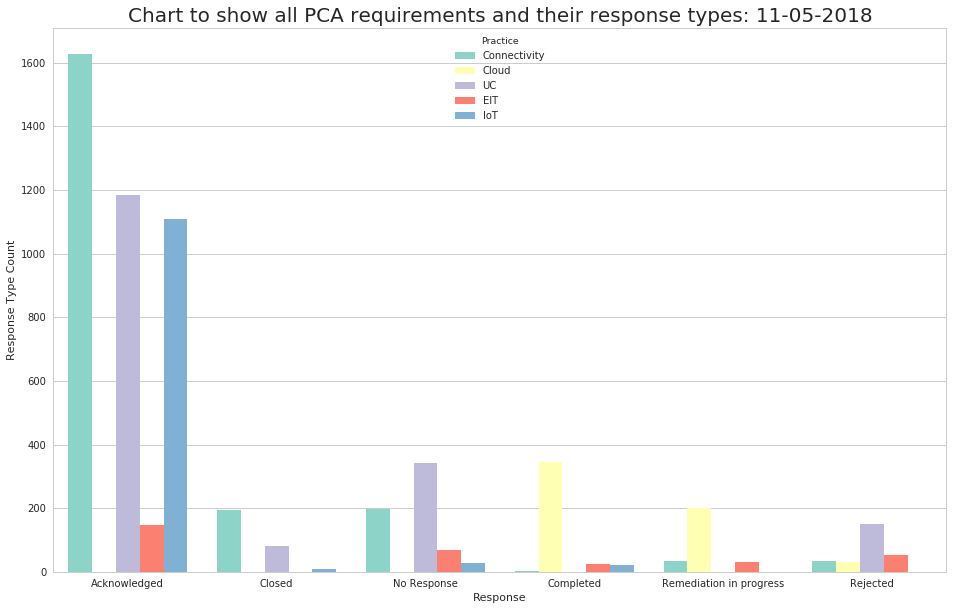

In [1532]:
fig, ax = plt.subplots(figsize=(16,10))

ax = sns.countplot(data=pca_df, ax=ax, x='Response', hue='Practice', saturation=1, palette='Set3')
ax.set_ylabel("Response Type Count")
ax.set_title("Chart to show all PCA requirements and their response types: "+today, size=20)
fig.savefig(OUTPUT_BASE_DIR+"/PCA-Responses-"+today+".png")

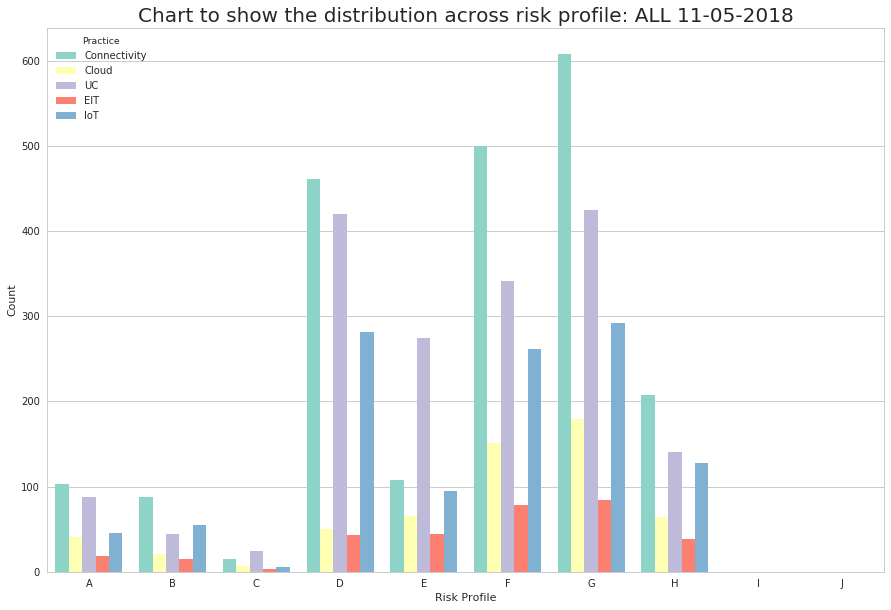

In [1533]:
fig, ax = plt.subplots(figsize=(15,10))

ax = sns.countplot(data=pca_df, ax=ax, x='Risk Category', hue='Practice',order=['A','B','C','D','E','F','G','H','I','J'],
                   saturation=1, palette='Set3')
ax.set_ylabel("Count")
ax.set_xlabel("Risk Profile")
ax.set_title("Chart to show the distribution across risk profile: "+PRACTICE+" "+today, size=20)

fig.savefig(OUTPUT_BASE_DIR+"/PCA-Risk-Profile-Distribution-"+today+".png")

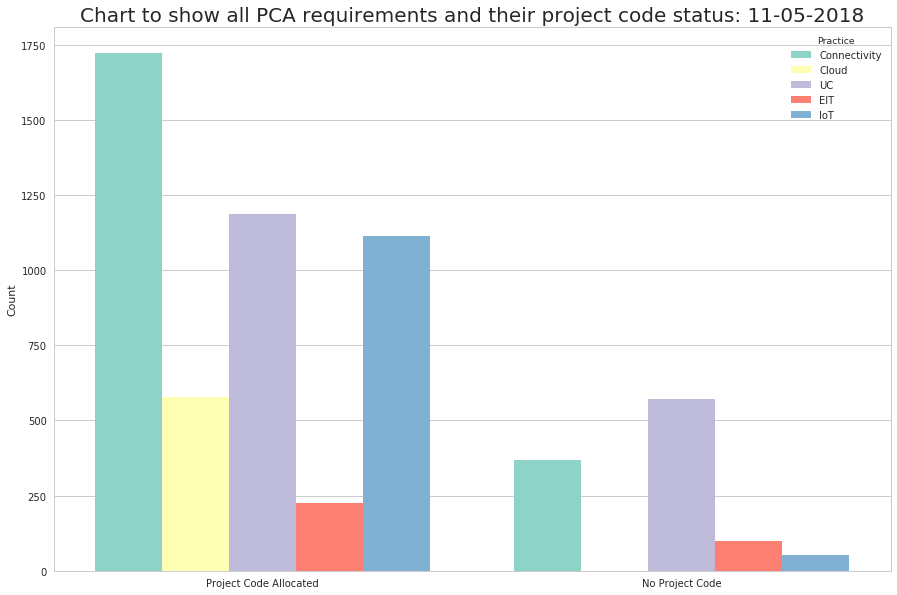

In [1534]:
fig, ax = plt.subplots(figsize=(15,10))

ax = sns.countplot(data=pca_df, ax=ax, x='Orphan', hue='Practice', saturation=1, palette='Set3')
ax.set_ylabel("Count")
ax.set_xlabel("")
ax.set_title("Chart to show all PCA requirements and their project code status: "+today, size=20)
fig.savefig(OUTPUT_BASE_DIR+"/PCA-ProjectCodeStatus-"+today+".png")

In [1535]:
#fig, ax = plt.subplots(figsize=(15,10))

#ax = sns.countplot(data=pca_df, ax=ax, x='Risk Category', hue='Practice', saturation=1, palette='Set3')
#ax.set_ylabel("Count")
#ax.set_xlabel("")
#ax.set_title("Chart to show all PCA requirements and their and their risk category: "+today, size=20)
#fig.savefig(OUTPUT_BASE_DIR+"/PCA-RiskCategory-"+today+".png")

In [1536]:
COLS = [67,68,89,90,91,94,97,101,102,103,109,110,43,44,46,16,49,52,54,55,56,57,59,62,63,64,176,189,117,116,10,12,21,22,27,28,29,31,33,42,66,72,80,81,118,121,156,158,126,136,141,128,130,129,198,127,1,2,4,5,7,8,9,14,70,71,87,123,193,194,195,147]
INDEX = ['1H','2H','3H','4H','5H','6V','7V','8H','9V','10V','11H','11V','12H','12V','13aH','13aV','13bH','13bV',
'14H','14V','15V','16V','17V','18H','18V','19V','20H','20V','21V','22V','23V','24V','25V','26V','27V','28V','29H',
'30H','31H','32H','32V','33V','34V','35H','36H','37H','37V','38H','38V','39H','39V','40H','40V','41H','41V','42H',
'42V','43H','43V','44V','45V','46H','46V','47H','47V','48H','48V','49H','49V','50H','51V','52H','52V','53V','54V',
'55V','56V','57H','57V','58H','59V','60H','61H','61V','62H','62V','63H','64H','65H','66H','67H','68H','69H','69V',
'70V','71V','72V','73H','74V','75H','76H','76V','77V','78V','79H','79V','80H']


converter = {'7H':'7V', 1: '1H', 2:'2H', 3:'3H', 5:'5H', 7:'7V', 9:'9V', 11:'11V', 12:'12V', 14:'14V', 15:'15V', 16:'16V',
             17:'17V', 18:'18V', 19:'19V', 20:'20V', 21:'21V', 22:'22V', 23:'23V', 26:'26V', 27:'27V', 28:'28V', 30:'30H', 
             31:'31H', 32:'32V', 35:'35H', 37:'37V', 38:'38V', 40:'40V', 41:'41V', 42:'42V', 43:'43H', 44:'44V', 45:'45V', 46:'46V', 
             47:'47V', 48: '48V', 49: '49V', 50:'50H', 51:'51V', 54:'54V', 57:'57V', 58:'58H', 59:'59V', 60:'60H', 61:'61V', 62:'62V', 63:'63H', 
             66:'66H', 67:'67H', 69:'69V', 70:'70V', 73:'73H', 74:'74V', 75:'75H', 76:'76V', 79:'79V'}

roll_up_converter = {'1H':1, '2H':2, '3H':3, '4H':4, '5H':5, '6V':6, '7V':7, '7H':7, '8H':8, '9V':9, 
                     '10V':10, '11H':11, '11V':11, '12H':12, '12V':12, '13aH':13, '13aV':13,
                     '13bH':13, '13bV':13, '14H':14, '14V':14, '15V':15,'16V':16, '17V':17, 
                     '18H':18, '18V':18, '19V':19, '20H':20, '20V':20, '21V':21, '22V':22, 
                     '23V':23, '24V':24, '25V':25, '26V':26, '27V':27, '28V':28, '29H':29,
                     '30H':30, '31H':31, '32H':32, '32V':32, '33V':33, '34V':34, '35H':35, '36H':36, 
                     '37H':37, '37V':37, '38H':38, '38V':38, '39H':39, '39V':39, '40H':40,
                     '40V':40, '41H':41, '41V':41, '42H':42, '42V':42, '43H':43, '43V':43, '44V':44,
                     '45V':45, '46H':46, '46V':46, '47H':47, '47V':47, '48H':48, '48V':48,
                     '49H':49, '49V':49, '50H':50, '51V':51, '52H':52, '52V':52, '53V':53,
                     '54V':54, '55V':55, '56V':56, '57H':57, '57V':57, '58H':58, '59V':59,
                     '60H':60, '61H':61, '61V':61, '62H':62, '62V':62, '63H':63, '64H':64,
                     '65H':65, '66H':66, '67H':67, '68H':68, '69H':69, '69V':69, '70V':70,
                     '71V':71, '72V':72, '73H':73, '74V':74, '75H':75, '76H':76, '76V':76,
                     '77V':77, '78V':78, '79H':79, '79V':79, '80H':80}


In [1537]:
heatmap_df = pd.DataFrame(columns=COLS, index=INDEX)
heatmap_df = heatmap_df[[67,68,89,90,91,94,97,101,102,103,109,110,
                         43,44,46,16,49,52,54,55,56,57,59,62,63,64,176,189,117,116,
                         10,12,21,22,27,28,29,31,33,42,66,72,80,81,118,121,156,158,
                         126,136,141,128,130,129,198,127,1,
                         2,4,5,7,8,9,14,70,71,87,123,193,194,195,147]]

response_heatmap = pd.DataFrame(columns=COLS, index=INDEX)
response_heatmap = response_heatmap[[67,68,89,90,91,94,97,101,102,103,109,110,
                         43,44,46,16,49,52,54,55,56,57,59,62,63,64,176,189,117,116,
                         10,12,21,22,27,28,29,31,33,42,66,72,80,81,118,121,156,158,
                         126,136,141,128,130,129,198,127,1,
                         2,4,5,7,8,9,14,70,71,87,123,193,194,195,147]]

In [1538]:
SCA_INDEX = ['9.2.1-A',
'9.2.2',
'9.2.3',
'9.2.5',
'9.2.6-A',
'9.2.6-B',
'9.4.1',
'9.4.2',
'12.4.1',
'12.4.3',
'13.1.1-R',
'13.2.1',
'13.2.2',
'14.1.2',
'18.1.4']


sca_response_heatmap_df = pd.DataFrame(columns=COLS, index=SCA_INDEX)
sca_response_heatmap_df = sca_response_heatmap_df[[67,68,89,90,91,94,97,101,102,103,109,110,
                                 43,44,46,16,49,52,54,55,56,57,59,62,63,64,176,189,117,116,
                                 10,12,21,22,27,28,29,31,33,42,66,72,80,81,118,121,156,158,
                                 126,136,141,128,130,129,198,127,1,
                                 2,4,5,7,8,9,14,70,71,87,123,193,194,195,147]]

sca_heatmap_df = sca_baseline.copy()
sca_response_heatmap_df = sca_baseline.copy()
sca_response_heatmap_df.head()

,67,68,89,90,91,94,97,101,102,103,...,9,14,70,71,87,123,193,194,195,147
9.2.1-A,3 - Partially adequate / Minor Non-Conformity ...,3 - Partially adequate / Minor Non-Conformity ...,3 - Partially adequate / Minor Non-Conformity ...,0 - n/a,3 - Partially adequate / Minor Non-Conformity ...,4 - Broadly adequate / Observation,4 - Broadly adequate / Observation,0 - n/a,4 - Broadly adequate / Observation,4 - Broadly adequate / Observation,...,0 - n/a,4 - Broadly adequate / Observation,3 - Partially adequate / Minor Non-Conformity ...,4 - Broadly adequate / Observation,0 - n/a,3 - Partially adequate / Minor Non-Conformity ...,0 - n/a,4 - Broadly adequate / Observation,0 - n/a,4 - Broadly adequate / Observation
9.2.2,3 - Partially adequate / Minor Non-Conformity ...,3 - Partially adequate / Minor Non-Conformity ...,3 - Partially adequate / Minor Non-Conformity ...,0 - n/a,3 - Partially adequate / Minor Non-Conformity ...,4 - Broadly adequate / Observation,4 - Broadly adequate / Observation,0 - n/a,4 - Broadly adequate / Observation,4 - Broadly adequate / Observation,...,3 - Partially adequate / Minor Non-Conformity ...,0 - n/a,0 - n/a,0 - n/a,0 - n/a,0 - n/a,0 - n/a,0 - n/a,0 - n/a,4 - Broadly adequate / Observation
9.2.3,3 - Partially adequate / Minor Non-Conformity ...,3 - Partially adequate / Minor Non-Conformity ...,3 - Partially adequate / Minor Non-Conformity ...,0 - n/a,2 - Inadequate / Minor Non-Conformity (high se...,4 - Broadly adequate / Observation,4 - Broadly adequate / Observation,0 - n/a,4 - Broadly adequate / Observation,4 - Broadly adequate / Observation,...,4 - Broadly adequate / Observation,0 - n/a,0 - n/a,0 - n/a,0 - n/a,0 - n/a,0 - n/a,0 - n/a,0 - n/a,4 - Broadly adequate / Observation
9.2.5,3 - Partially adequate / Minor Non-Conformity ...,3 - Partially adequate / Minor Non-Conformity ...,3 - Partially adequate / Minor Non-Conformity ...,0 - n/a,2 - Inadequate / Minor Non-Conformity (high se...,4 - Broadly adequate / Observation,4 - Broadly adequate / Observation,0 - n/a,4 - Broadly adequate / Observation,4 - Broadly adequate / Observation,...,2 - Inadequate / Minor Non-Conformity (high se...,4 - Broadly adequate / Observation,3 - Partially adequate / Minor Non-Conformity ...,0 - n/a,4 - Broadly adequate / Observation,3 - Partially adequate / Minor Non-Conformity ...,0 - n/a,4 - Broadly adequate / Observation,0 - n/a,4 - Broadly adequate / Observation
9.2.6-A,3 - Partially adequate / Minor Non-Conformity ...,3 - Partially adequate / Minor Non-Conformity ...,3 - Partially adequate / Minor Non-Conformity ...,0 - n/a,2 - Inadequate / Minor Non-Conformity (high se...,3 - Partially adequate / Minor Non-Conformity ...,3 - Partially adequate / Minor Non-Conformity ...,0 - n/a,3 - Partially adequate / Minor Non-Conformity ...,3 - Partially adequate / Minor Non-Conformity ...,...,2 - Inadequate / Minor Non-Conformity (high se...,4 - Broadly adequate / Observation,2 - Inadequate / Minor Non-Conformity (high se...,0 - n/a,0 - n/a,2 - Inadequate / Minor Non-Conformity (high se...,0 - n/a,4 - Broadly adequate / Observation,0 - n/a,4 - Broadly adequate / Observation


In [1539]:
"""
SCA_COMPLIANCE = {
    '0 - n/a':0,
    '1 - Very Inadequate / Major Non-Conformity':1,
    '2 - Inadequate / Minor Non-Conformity (high severity)':2,
    '3 - Partially adequate / Minor Non-Conformity (low severity)':3,
    '4 - Broadly adequate / Observation':4,
    '5 - Substantially adequate / Compliant':5
}

RESPONSE_TYPES = {
    'N/A':0,
    'Closed': 1,
    'Completed':2,
    'Remediation in progress':3,
    'Rejected':4,
    'Acknowledged':5,
    'No Response':6
}
"""

sca_response_heatmap_df.replace(to_replace=list(SCA_COMPLIANCE.keys()), value=list(SCA_COMPLIANCE.values()), inplace=True)
sca_response_heatmap_df.replace(to_replace=[1,2,3,4,5], value=[6,6,6,6,6], inplace=True)
sca_response_heatmap_df.head()

,67,68,89,90,91,94,97,101,102,103,...,9,14,70,71,87,123,193,194,195,147
9.2.1-A,6,6,6,0,6,6,6,0,6,6,...,0,6,6,6,0,6,0,6,0,6
9.2.2,6,6,6,0,6,6,6,0,6,6,...,6,0,0,0,0,0,0,0,0,6
9.2.3,6,6,6,0,6,6,6,0,6,6,...,6,0,0,0,0,0,0,0,0,6
9.2.5,6,6,6,0,6,6,6,0,6,6,...,6,6,6,0,6,6,0,6,0,6
9.2.6-A,6,6,6,0,6,6,6,0,6,6,...,6,6,6,0,0,6,0,6,0,6


In [1540]:
pca_df['Compliance Assessment'].value_counts()

PARTIALLY COMPLIANT      2805
NON-COMPLIANT            1563
PARTIALLY COMPLIANT f     665
PARTIALLY COMPLIANT       398
NON-COMPLIANT f           263
N/A                       131
NON-COMPLIANT              74
FULLY COMPLIANT            16
N/a                         3
Name: Compliance Assessment, dtype: int64

In [1541]:
pca_df['Compliance Assessment'].fillna('UNKNOWN', inplace=True)

In [1542]:
#pca_df[pca_df['Product ID'] == 22]
pca_df['Compliance Assessment'].value_counts()

PARTIALLY COMPLIANT      2805
NON-COMPLIANT            1563
PARTIALLY COMPLIANT f     665
PARTIALLY COMPLIANT       398
NON-COMPLIANT f           263
N/A                       131
NON-COMPLIANT              74
FULLY COMPLIANT            16
N/a                         3
Name: Compliance Assessment, dtype: int64

In [1543]:
pca_baseline[27].value_counts()

PARTIALLY COMPLIANT       15
FULLY COMPLIANT           12
RESOLVED                   8
NON-COMPLIANT              6
NON-COMPLIANT(F)           2
PARTIALLY COMPLIANT(F)     1
Name: 27, dtype: int64

## Set the target heatmap the same as the previous baseline

In [1544]:
#pca_df['Req Ref'].str.slice(11, -2)
heatmap_df.fillna('N/A',inplace=True)

for col in heatmap_df.columns:
    for row in heatmap_df.index:
        heatmap_df.loc[row][col] = pca_rollup_target.loc[int(row.strip('HVab'))][col]

heatmap_df[118]

1H      3
2H      3
3H      2
4H      5
5H      3
6V      3
7V      3
8H      1
9V      2
10V     2
11H     2
11V     2
12H     1
12V     1
13aH    2
13aV    2
13bH    2
13bV    2
14H     1
14V     1
15V     3
16V     2
17V     1
18H     1
18V     1
19V     3
20H     1
20V     1
21V     1
22V     3
       ..
57H     3
57V     3
58H     1
59V     1
60H     4
61H     3
61V     3
62H     3
62V     3
63H     1
64H     1
65H     1
66H     4
67H     4
68H     1
69H     3
69V     3
70V     3
71V     3
72V     3
73H     4
74V     3
75H     3
76H     4
76V     4
77V     1
78V     1
79H     1
79V     1
80H     1
Name: 118, Length: 107, dtype: object

In [1545]:
heatmap_df.loc['2H'][189]

5

In [1546]:
pca_rollup_target[27].value_counts()

1    36
4    16
3    12
5     8
2     8
Name: 27, dtype: int64

In [1547]:
forcast_heatmap_df = pca_df.copy()
sca_forcast_heatmap_df = sca_df.copy()

forcast_heatmap_df.loc[forcast_heatmap_df['Delivery Date'] <= '2018-05-25','Compliance Assessment'] = 'FULLY COMPLIANT'
sca_forcast_heatmap_df.loc[sca_forcast_heatmap_df['Delivery Date'] <= '2018-05-25','Compliance Assessment'] = '5 - Substantially adequate / Compliant'

sca_forcast_heatmap_df[sca_forcast_heatmap_df['Delivery Date'] <= '2018-05-25']

,Compliance Assessment,Delivery Date,Entity Count,Filename,Product ID,Remediation Project Ref,Req Ref,Req nr,Response,Response Comments,Product Ref,Category,Orphan,Practice,Risk Category,Approved by DPO:,"If Approved, change to ?",New Comment to be inserted into RS and DPIA
126,5 - Substantially adequate / Compliant,2018-05-04,3.0,GDPR-RS-EPS059-Primary-Storage-V4.1-REVIEWED-(...,59,PRJ03563,EPS059-SCA-12.4.3-A,12.4.3,Completed,TDO Self Assessment\n100% Complete\n5 - Substa...,EPS059-SCA-12.4.3,SCA,Project Code Allocated,Cloud,UNKNOWN,NaN,NaN,NaN
127,5 - Substantially adequate / Compliant,2018-05-04,3.0,GDPR-RS-EPS059-Primary-Storage-V4.1-REVIEWED-(...,59,PRJ03563,EPS059-SCA-9.2.1-A-A,9.2.1-A,Completed,TDO In-Life Improvement Activities are ~99% co...,EPS059-SCA-9.2.1-A,SCA,Project Code Allocated,Cloud,UNKNOWN,NaN,NaN,NaN
128,5 - Substantially adequate / Compliant,2018-05-04,3.0,GDPR-RS-EPS059-Primary-Storage-V4.1-REVIEWED-(...,59,PRJ03563,EPS059-SCA-9.2.2-A,9.2.2,Completed,TDO In-Life Improvement Activities are ~99% co...,EPS059-SCA-9.2.2,SCA,Project Code Allocated,Cloud,UNKNOWN,NaN,NaN,NaN
129,5 - Substantially adequate / Compliant,2018-05-04,3.0,GDPR-RS-EPS059-Primary-Storage-V4.1-REVIEWED-(...,59,PRJ03563,EPS059-SCA-9.2.3-A,9.2.3,Completed,TDO In-Life Improvement Activities are ~99% co...,EPS059-SCA-9.2.3,SCA,Project Code Allocated,Cloud,UNKNOWN,NaN,NaN,NaN
130,5 - Substantially adequate / Compliant,2018-05-04,3.0,GDPR-RS-EPS059-Primary-Storage-V4.1-REVIEWED-(...,59,PRJ03563,EPS059-SCA-9.2.5-A,9.2.5,Completed,TDO In-Life Improvement Activities are ~99% co...,EPS059-SCA-9.2.5,SCA,Project Code Allocated,Cloud,UNKNOWN,NaN,NaN,NaN
131,5 - Substantially adequate / Compliant,2018-05-04,3.0,GDPR-RS-EPS059-Primary-Storage-V4.1-REVIEWED-(...,59,PRJ03563,EPS059-SCA-9.2.6-A-A,9.2.6-A,Completed,TDO In-Life Improvement Activities are ~99% co...,EPS059-SCA-9.2.6-A,SCA,Project Code Allocated,Cloud,UNKNOWN,NaN,NaN,NaN
132,5 - Substantially adequate / Compliant,2018-05-04,3.0,GDPR-RS-EPS059-Primary-Storage-V4.1-REVIEWED-(...,59,PRJ03563,EPS059-SCA-9.2.6-B-A,9.2.6-B,Completed,TDO In-Life Improvement Activities are ~99% co...,EPS059-SCA-9.2.6-B,SCA,Project Code Allocated,Cloud,UNKNOWN,NaN,NaN,NaN
133,5 - Substantially adequate / Compliant,2018-05-04,3.0,GDPR-RS-EPS059-Primary-Storage-V4.1-REVIEWED-(...,59,PRJ03563,EPS059-SCA-9.4.1-A,9.4.1,Completed,TDO In-Life Improvement Activities are ~99% co...,EPS059-SCA-9.4.1,SCA,Project Code Allocated,Cloud,UNKNOWN,NaN,NaN,NaN
134,5 - Substantially adequate / Compliant,2018-05-04,3.0,GDPR-RS-EPS059-Primary-Storage-V4.1-REVIEWED-(...,59,PRJ03563,EPS059-SCA-9.4.2-A,9.4.2,Completed,TDO In-Life Improvement Activities are ~99% co...,EPS059-SCA-9.4.2,SCA,Project Code Allocated,Cloud,UNKNOWN,NaN,NaN,NaN
342,5 - Substantially adequate / Compliant,2018-05-04,3.0,GDPR-RS-EPS064-Total-Cloud-Flex-V4.1-REVIEWED-...,64,No Response,EPS064-SCA-18.1.4-A,18.1.4,Rejected,"Thought to be out of scope, in conversations w...",EPS064-SCA-18.1.4,SCA,No Project Code,Cloud,UNKNOWN,NaN,NaN,NaN


In [1548]:
forcast_heatmap = heatmap_df.copy()

In [1549]:
pca_df[pca_df['Product ID'] == 118]

,Compliance Assessment,Delivery Date,Entity Count,Filename,Product ID,Remediation Project Ref,Req Ref,Req nr,Response,Response Comments,Product Ref,Category,Orphan,Practice,Risk Category,Approved by DPO:,"If Approved, change to ?",New Comment to be inserted into RS and DPIA
1349,NON-COMPLIANT,2018-05-18,3.0,GDPR-RS-EPS118-Consolidated Spend Analytics-V4...,118,GE-PCA-4H,EPS118-PCA-4H-A,4H,Acknowledged,Action on Product team to contact James Taylor...,EPS118-PCA-4H,PCA,Project Code Allocated,Connectivity,B,NaN,NaN,NaN
1350,N/A,NaT,3.0,GDPR-RS-EPS118-Consolidated Spend Analytics-V4...,118,No Response,EPS118-PCA-11H-A,11H,Closed,changed from NC/PC as a result of Privacy 2nd ...,EPS118-PCA-11H,PCA,No Project Code,Connectivity,D,NaN,NaN,NaN
1351,N/A,NaT,3.0,GDPR-RS-EPS118-Consolidated Spend Analytics-V4...,118,No Response,EPS118-PCA-11V-A,11V,Closed,changed from NC/PC as a result of Privacy 2nd ...,EPS118-PCA-11V,PCA,No Project Code,Connectivity,D,NaN,NaN,NaN
1352,PARTIALLY COMPLIANT,2018-04-30,3.0,GDPR-RS-EPS118-Consolidated Spend Analytics-V4...,118,GE-PCA-12H,EPS118-PCA-12H-A,12H,Acknowledged,Do we need to track this as 12V has been agree...,EPS118-PCA-12H,PCA,Project Code Allocated,Connectivity,D,NaN,NaN,NaN
1353,N/A,NaT,3.0,GDPR-RS-EPS118-Consolidated Spend Analytics-V4...,118,No Response,EPS118-PCA-12V-A,12V,Closed,changed from NC/PC as a result of Privacy 2nd ...,EPS118-PCA-12V,PCA,No Project Code,Connectivity,D,NaN,NaN,NaN
1354,PARTIALLY COMPLIANT,2017-04-30,3.0,GDPR-RS-EPS118-Consolidated Spend Analytics-V4...,118,GE-PCA-49H,EPS118-PCA-49H-A,49H,Acknowledged,Support/test teams make use of anonymization t...,EPS118-PCA-49H,PCA,Project Code Allocated,Connectivity,F,NaN,NaN,NaN
1355,PARTIALLY COMPLIANT,2018-10-31,3.0,GDPR-RS-EPS118-Consolidated Spend Analytics-V4...,118,PRJ03373,EPS118-PCA-49V-A,49V,Acknowledged,Support/test teams make use of anonymization t...,EPS118-PCA-49V,PCA,Project Code Allocated,Connectivity,F,NaN,NaN,NaN
1356,PARTIALLY COMPLIANT,2018-10-31,3.0,GDPR-RS-EPS118-Consolidated Spend Analytics-V4...,118,PRJ03373,EPS118-PCA-51V-A,51V,Acknowledged,Action on Product team to cross check current ...,EPS118-PCA-51V,PCA,Project Code Allocated,Connectivity,F,NaN,NaN,NaN
1357,PARTIALLY COMPLIANT,2018-05-18,3.0,GDPR-RS-EPS118-Consolidated Spend Analytics-V4...,118,GE-PCA-60H,EPS118-PCA-60H-A,60H,Acknowledged,Process to be developed by Catesian. Then casc...,EPS118-PCA-60H,PCA,Project Code Allocated,Connectivity,G,NaN,NaN,NaN
1358,PARTIALLY COMPLIANT,2018-05-18,3.0,GDPR-RS-EPS118-Consolidated Spend Analytics-V4...,118,GE-PCA-66H,EPS118-PCA-66H-A,66H,Acknowledged,NaN,EPS118-PCA-66H,PCA,Project Code Allocated,Connectivity,G,NaN,NaN,NaN


## Update the heatmaps with RS data

In [1550]:
iter_count = 0

for p in COLS:
    prod_filter = pca_df['Product ID'] == p
    prod_df = pca_df[prod_filter]
    for r in prod_df['Req Ref']:
        if p == 193:
            pca = r[12:-2]
        else:
            pca = r[11:-2]
            
        #print("PCA ref: {0}".format(pca))
        if pca in INDEX:
            iter_count = iter_count + 1
            compliance_value = PCA_COMPLIANCE.get(prod_df[prod_df['Req Ref'] == r]['Compliance Assessment'].iloc[0], 0)
            
            # update the forecast heatmap.
            forcast_value = PCA_COMPLIANCE.get(forcast_heatmap_df[forcast_heatmap_df['Req Ref'] == r]['Compliance Assessment'].iloc[0], 0)

            # collect a heatmap for responses.
            response_value = RESPONSE_TYPES.get(prod_df[prod_df['Req Ref'] == r]['Response'].iloc[0], 0)
            #print response_value
            if response_value < RESPONSE_TYPES.get(response_heatmap.loc[pca][p], 10):
                #print 'AB: update response heatmap'
                response_heatmap.loc[pca][p] = response_value
            
            
            
            if pca == '10V':
                if p == 118:
                    print 'AB 10V product = 118'
                    print compliance_value
                    print heatmap_df.loc[pca][p]
            
            if ((compliance_value < heatmap_df.loc[pca][p]) and (heatmap_df.loc[pca][p] != 2)):
                #print 'AB: update heatmap'
                heatmap_df.loc[pca][p] = compliance_value
                
            if forcast_value < forcast_heatmap.loc[pca][p]:
                forcast_heatmap.loc[pca][p] = forcast_value
                
            #update the baseline
            if ((compliance_value < PCA_COMPLIANCE.get(pca_baseline.loc[roll_up_converter.get(pca)][p])) and 
                (PCA_COMPLIANCE.get(pca_baseline.loc[roll_up_converter.get(pca)][p]) != 2)): 
                pca_baseline.loc[roll_up_converter.get(pca)][p] = PCA_COMPLIANCE_INVERSE.get(compliance_value)
                #print("1b:Update baseline, value = {0}".format(pca_baseline.loc[roll_up_converter.get(pca)][p]))
                
            # update the rollup heatmap
            if ((compliance_value < pca_rollup_target.loc[roll_up_converter.get(pca)][p]) and 
                (pca_rollup_target.loc[roll_up_converter.get(pca)][p] != 2)):
                #if the compliance value is better than the baseline heatmap then update it.
                pca_rollup_target.loc[roll_up_converter.get(pca)][p] = compliance_value
                        
            if compliance_value == 0:
                print("1: Compliance Value: {0}".format(prod_df[prod_df['Req Ref'] == r]['Compliance Assessment'].iloc[0]))
                print("1: Product: {0}".format(p))
                sys.exit("EXIT") # using this as an assert.
                
        else:
            if r in converter.keys():
                compliance_value = PCA_COMPLIANCE.get(prod_df[prod_df['Req Ref'] == r]['Compliance Assessment'].iloc[0], 0)

                # update the forecast heatmap.
                forcast_value = PCA_COMPLIANCE.get(forcast_heatmap_df[forcast_heatmap_df['Req Ref'] == r]['Compliance Assessment'].iloc[0], 0)
                
                # collect a heatmap for responses.
                response_value = RESPONSE_TYPES.get(prod_df[prod_df['Req Ref'] == r]['Response'].iloc[0], 6)
                if response_value < RESPONSE_TYPES.get(response_heatmap.loc[pca][p], 10):
                    print 'AB else: update response heatmap'
                    response_heatmap.loc[pca][p] = response_value
                    
                # update the rollup heatmap
                if ((compliance_value < pca_rollup_target.loc[roll_up_converter.get(pca)][p]) and 
                    (pca_rollup_target.loc[roll_up_converter.get(pca)][p] != 2)):
                    pca_rollup_target.loc[roll_up_converter.get(pca)][p] = compliance_value

                #update the baseline
                if ((compliance_value < PCA_COMPLIANCE.get(pca_baseline.loc[roll_up_converter.get(pca)][p])) and
                    PCA_COMPLIANCE.get(pca_baseline.loc[roll_up_converter.get(pca)][p]) != 2):
                    pca_baseline.loc[roll_up_converter.get(pca)][p] = PCA_COMPLIANCE_INVERSE.get(compliance_value)
                    print "2:Update baseline"
                    
                if compliance_value == 0:
                    #print("Compliance Value: {0:s}".format(prod_df[prod_df['Req nr'] == r]['Compliance Assessment'].iloc[0]))
                    sys.exit("EXIT") # using this as an assert.
                    
                if ((compliance_value < heatmap_df.loc[pca][p]) and (heatmap_df.loc[pca][p] != 2)):
                    heatmap_df.loc[pca][p] = compliance_value

                if forcast_value < forcast_heatmap.loc[pca][p]:
                    forcast_heatmap.loc[pca][p] = forcast_value
                    
                
                #else:
                    #print("Compliance Value: {0:s}".format(prod_df[prod_df['Req nr'] == r]['Compliance Assessment'].iloc[0]))
                    #print("Heatmap Value: {0:s}".format(heatmap_df.loc[r][p]))
                    #sys.exit("EXIT")
            else:
                print("13: Req nr not in index: {0}".format(pca))
                sys.exit("EXIT")
                    
print("iter_count: {0}".format(iter_count))            

AB 10V product = 118
1
2
AB 10V product = 118
1
2
AB 10V product = 118
1
2
AB 10V product = 118
1
2
iter_count: 5905


In [1551]:
forcast_heatmap

,67,68,89,90,91,94,97,101,102,103,...,9,14,70,71,87,123,193,194,195,147
1H,3,3,3,3,3,3,3,2,3,3,...,3,2,3,3,3,3,2,2,2,3
2H,3,3,3,3,3,3,3,2,3,3,...,3,2,3,3,3,3,2,2,2,3
3H,3,2,3,2,2,3,2,2,2,3,...,2,1,3,3,1,2,1,1,1,1
4H,2,3,3,3,3,3,3,2,3,3,...,3,2,3,3,3,3,2,2,2,3
5H,3,3,3,3,3,3,3,2,3,3,...,3,2,3,3,3,3,2,2,3,3
6V,3,3,3,3,4,2,3,2,3,4,...,3,3,3,3,3,3,3,3,2,3
7V,3,3,3,4,4,3,3,2,1,3,...,3,2,1,1,1,1,2,2,2,1
8H,2,1,1,1,1,1,2,1,2,1,...,1,2,1,1,1,1,1,2,2,1
9V,3,1,1,4,2,1,3,2,1,3,...,4,2,1,1,1,4,3,2,1,1
10V,1,1,3,3,2,2,3,2,2,1,...,3,2,1,4,3,3,3,2,2,4


In [1552]:
pca_rollup_target[198].value_counts()

1    62
4    11
3     7
Name: 198, dtype: int64

In [1553]:
pca_baseline[198].value_counts()

PARTIALLY COMPLIANT    11
FULLY COMPLIANT         7
Name: 198, dtype: int64

In [1554]:
response_heatmap.fillna(0, inplace=True)
response_heatmap.head()

,67,68,89,90,91,94,97,101,102,103,...,9,14,70,71,87,123,193,194,195,147
1H,0,1,0,0,0,0,0,0,0,0,...,5,6,5,5,5,5,6,6,6,5
2H,5,1,5,5,5,5,0,6,5,5,...,1,6,1,1,1,1,6,6,6,0
3H,5,0,0,0,0,0,0,6,0,0,...,0,0,0,0,0,0,0,0,0,0
4H,0,0,5,5,5,5,5,6,5,5,...,0,6,0,0,0,0,6,6,6,5
5H,0,0,0,5,0,0,5,0,0,0,...,0,6,0,0,5,0,6,6,0,0


In [1555]:
#Create Heatmap for SNS (convert to numbers)
input_heatmap = heatmap_df.copy()
#input_heatmap.fillna('OoS', inplace=True)
#input_heatmap.replace(to_replace='OoS', value=0, inplace=True)
#input_heatmap.replace(to_replace='N/A', value=PCA_COMPLIANCE.get('N/A'), inplace=True)
#input_heatmap.replace(to_replace='FULLY COMPLIANT', value=PCA_COMPLIANCE.get('FULLY COMPLIANT'), inplace=True)
#input_heatmap.replace(to_replace='FULLY COMPLIANT ', value=PCA_COMPLIANCE.get('FULLY COMPLIANT '), inplace=True)
#input_heatmap.replace(to_replace='PARTIALLY COMPLIANT f', value=PCA_COMPLIANCE.get('PARTIALLY COMPLIANT f'), inplace=True)
#input_heatmap.replace(to_replace='PARTIALLY COMPLIANT', value=PCA_COMPLIANCE.get('PARTIALLY COMPLIANT'), inplace=True)
#input_heatmap.replace(to_replace='PARTIALLY COMPLIANT ', value=PCA_COMPLIANCE.get('PARTIALLY COMPLIANT '), inplace=True)
#input_heatmap.replace(to_replace='NON-COMPLIANT f', value=PCA_COMPLIANCE.get('NON-COMPLIANT f'), inplace=True)
#input_heatmap.replace(to_replace='NON-COMPLIANT', value=PCA_COMPLIANCE.get('NON-COMPLIANT'), inplace=True)
#input_heatmap.replace(to_replace='NON-COMPLIANT ', value=PCA_COMPLIANCE.get('NON-COMPLIANT '), inplace=True)

#input_heatmap.fillna('N/A', inplace=True)

#for key in PCA_COMPLIANCE.keys():
#    input_heatmap.replace(key, value=PCA_COMPLIANCE.get(key), inplace=True)


In [1556]:
input_heatmap

,67,68,89,90,91,94,97,101,102,103,...,9,14,70,71,87,123,193,194,195,147
1H,3,4,3,3,3,3,3,2,3,3,...,5,2,4,4,5,5,2,2,2,5
2H,4,4,4,4,4,4,3,2,4,4,...,5,2,4,4,5,4,2,2,2,3
3H,4,2,3,2,2,3,2,2,2,3,...,2,1,3,3,1,2,1,1,1,1
4H,2,3,5,5,5,5,5,2,5,5,...,3,2,3,3,3,3,2,2,2,5
5H,3,3,3,4,3,3,4,2,3,3,...,3,2,3,3,4,3,2,2,3,3
6V,3,3,3,4,4,2,3,2,4,4,...,3,3,3,3,3,3,3,3,2,3
7V,3,3,3,4,4,3,3,2,1,4,...,3,2,1,1,1,1,2,2,2,1
8H,2,1,1,1,1,1,2,1,2,1,...,1,2,1,1,1,1,1,2,2,1
9V,3,1,1,4,2,1,3,2,1,3,...,4,2,1,1,1,4,3,2,1,1
10V,1,1,3,3,2,2,3,2,2,1,...,3,2,1,4,3,3,3,2,2,4


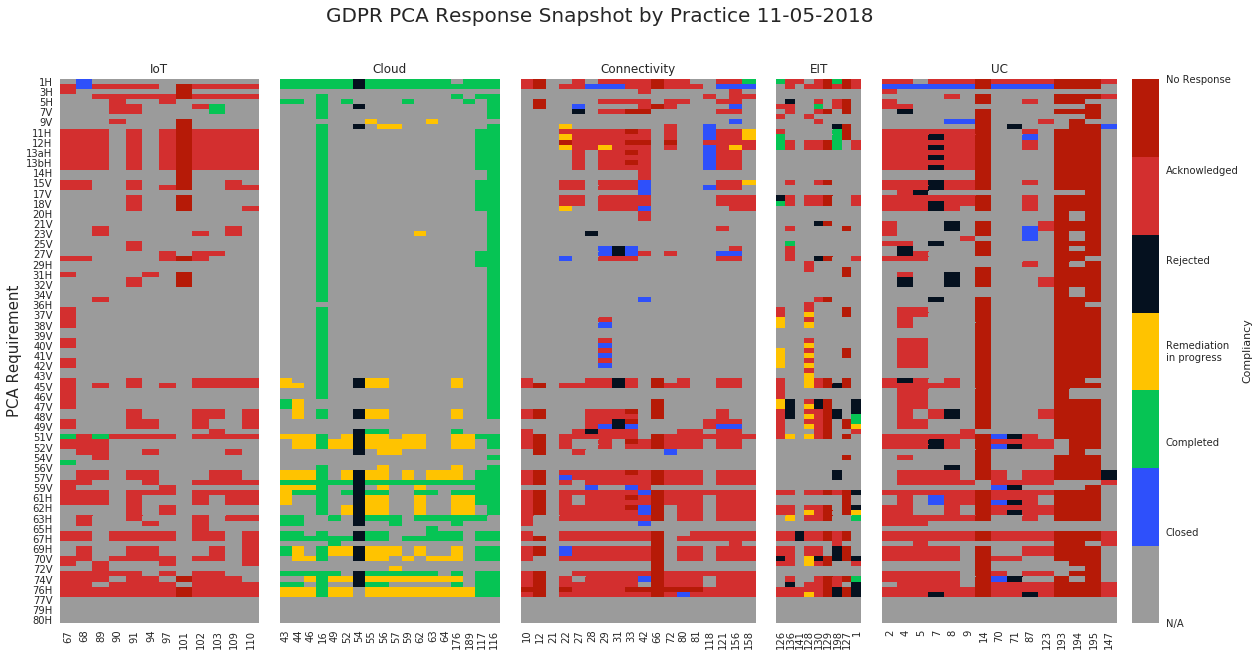

In [1557]:
baseline_iot_heatmap = response_heatmap[iot_cols]
baseline_cloud_heatmap = response_heatmap[cloud_cols]
baseline_connectivity_heatmap = response_heatmap[connectivity_cols]
baseline_eit_heatmap = response_heatmap[eit_cols]
baseline_uc_heatmap = response_heatmap[uc_cols]

f, (ax, ax1, ax2, ax3, ax4) = plt.subplots(ncols=5, sharex=False, sharey=True, figsize=(20, 10), 
                                           gridspec_kw={"width_ratios":[0.68,0.75,0.8,0.29,1]})
#f.colorbar
f.subplots_adjust(hspace=0.1,wspace=0.1)
#f.subplots_adjust(right=0.5)

BLACK = '#05111F'
DARKRED = '#B61A07'

cmap=mcolors.ListedColormap([GREY,
                             BLUE,
                             GREEN,
                             AMBER,
                             BLACK,
                             RED,
                             DARKRED])


title = "GDPR PCA Response Snapshot by Practice "+today
f.suptitle(title, size=20)


zx = sns.heatmap(baseline_iot_heatmap, ax=ax, square=False, vmin=0, vmax=6, cmap=cmap, cbar=False, yticklabels=True, xticklabels=True)

ax.set_title('IoT')
ax.set_ylabel('PCA Requirement', size=15)

zx1 = sns.heatmap(baseline_cloud_heatmap, ax=ax1, square=False, vmin=0, vmax=6, cmap=cmap, cbar=False, xticklabels=True)
ax1.set_title('Cloud')

zx2 = sns.heatmap(baseline_connectivity_heatmap, ax=ax2, square=False, vmin=0, vmax=6, cmap=cmap, cbar=False, xticklabels=True)
ax2.set_title('Connectivity')

zx3 = sns.heatmap(baseline_eit_heatmap, ax=ax3, square=False, vmin=0, vmax=6, cmap=cmap, cbar=False, xticklabels=True)
ax3.set_title('EIT')

zx4 = sns.heatmap(baseline_uc_heatmap, ax=ax4, square=False, vmin=0, vmax=6, cmap=cmap, xticklabels=True, cbar_kws={"orientation": "vertical","label": "Compliancy"})
ax4.set_title('UC')

cbar = zx4.collections[0].colorbar
cbar.set_ticks([0, 1, 2, 3, 4, 5, 6])
cbar.set_ticklabels(['N/A',
                     'Closed',
                     'Completed',
                     'Remediation \nin progress',
                     'Rejected',
                     'Acknowledged',
                     'No Response'])

f.savefig(OUTPUT_BASE_DIR+"/PCA-Response-Heatmap-"+today+".png")

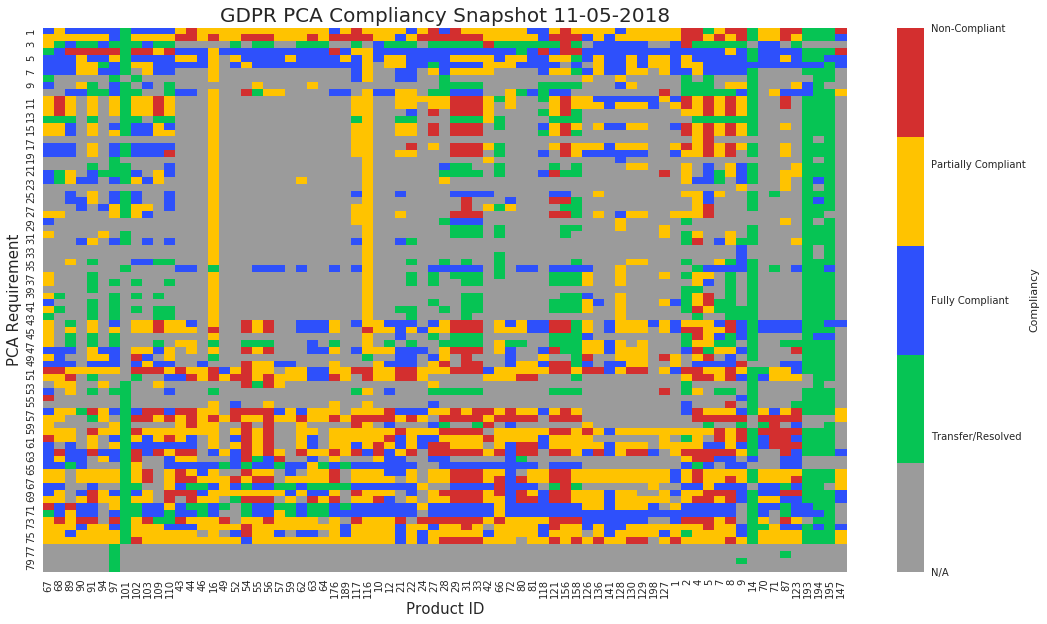

In [1558]:
f, ax = plt.subplots(figsize=(18, 10))
#f.colorbar
cmap=mcolors.ListedColormap([GREY,
                             GREEN,
                             BLUE,
                             AMBER,
                             RED])
zx = sns.heatmap(pca_rollup_target, ax=ax, square=False, cmap=cmap, yticklabels='auto', cbar_kws={"orientation": "vertical","label": "Compliancy"})
title = "GDPR PCA Compliancy Snapshot "+today
plt.title(title, size=20)
plt.xlabel('Product ID', size=15)
plt.ylabel('PCA Requirement', size=15)
cbar = zx.collections[0].colorbar
cbar.set_ticks([1, 2, 3, 4, 5])
cbar.set_ticklabels(['N/A',
                     'Transfer/Resolved',
                     'Fully Compliant', 
                     'Partially Compliant', 
                     'Non-Compliant'])

f.savefig(OUTPUT_BASE_DIR+"/PCA-Compliancy-Heatmap-"+today+".png")

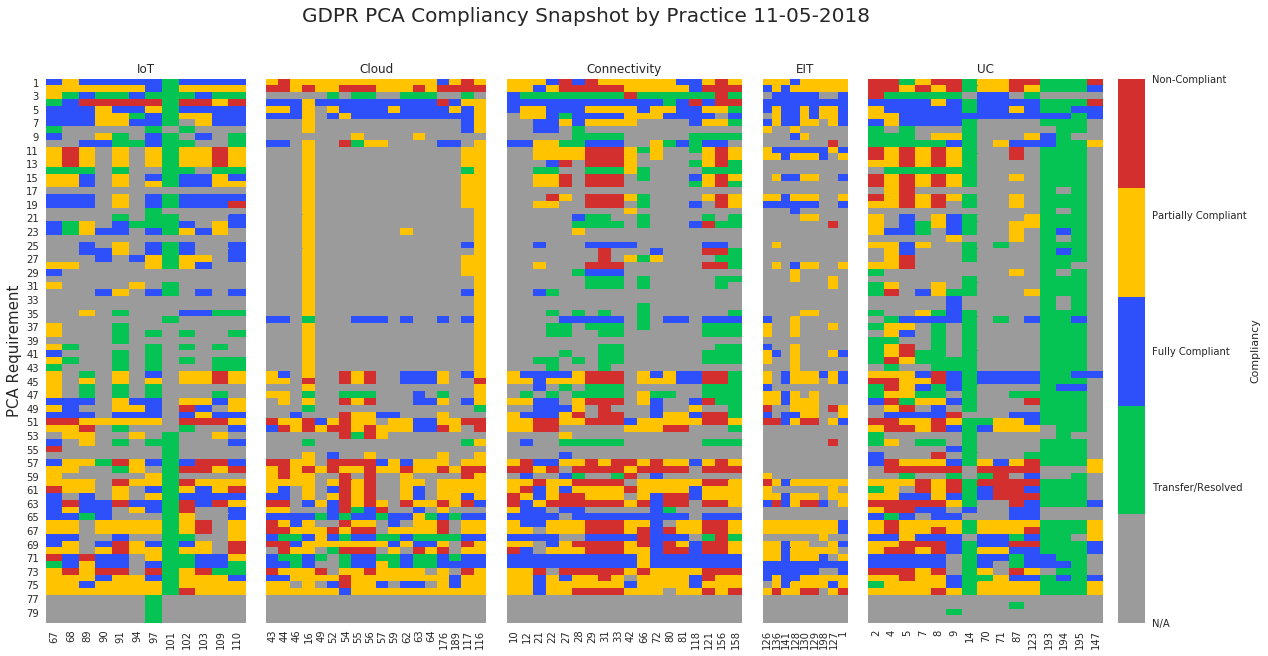

In [1559]:
# create subplots
pca_rollup_target.columns.name = ""

baseline_iot_heatmap = pca_rollup_target[iot_cols]
baseline_cloud_heatmap = pca_rollup_target[cloud_cols]
baseline_connectivity_heatmap = pca_rollup_target[connectivity_cols]
baseline_eit_heatmap = pca_rollup_target[eit_cols]
baseline_uc_heatmap = pca_rollup_target[uc_cols]

f, (ax, ax1, ax2, ax3, ax4) = plt.subplots(ncols=5, sharex=False, sharey=True, figsize=(20, 10), 
                                           gridspec_kw={"width_ratios":[0.68,0.75,0.8,0.29,1]})
#f.colorbar
f.subplots_adjust(hspace=0.1,wspace=0.1)
#f.subplots_adjust(right=0.5)

#cmap=mcolors.ListedColormap(['#9B9B9B',
#                             '#06C454',
#                             '#2E50FB',
#                             '#FFC300',
#                             '#C70039'])
cmap=mcolors.ListedColormap([GREY,
                             GREEN,
                             BLUE,
                             AMBER,
                             RED])


title = "GDPR PCA Compliancy Snapshot by Practice "+today
f.suptitle(title, size=20)


zx = sns.heatmap(baseline_iot_heatmap, ax=ax, square=False, vmin=1, vmax=5, cmap=cmap, cbar=False, yticklabels=True, xticklabels=True)

ax.set_title('IoT')
ax.set_ylabel('PCA Requirement', size=15)

zx1 = sns.heatmap(baseline_cloud_heatmap, ax=ax1, square=False, vmin=1, vmax=5, cmap=cmap, cbar=False, xticklabels=True)
ax1.set_title('Cloud')

zx2 = sns.heatmap(baseline_connectivity_heatmap, ax=ax2, square=False, vmin=1, vmax=5, cmap=cmap, cbar=False, xticklabels=True)
ax2.set_title('Connectivity')

zx3 = sns.heatmap(baseline_eit_heatmap, ax=ax3, square=False, vmin=1, vmax=5, cmap=cmap, cbar=False, xticklabels=True)
ax3.set_title('EIT')

zx4 = sns.heatmap(baseline_uc_heatmap, ax=ax4, square=False, vmin=1, vmax=5, cmap=cmap, xticklabels=True, cbar_kws={"orientation": "vertical","label": "Compliancy"})
ax4.set_title('UC')

cbar = zx4.collections[0].colorbar
cbar.set_ticks([1, 2, 3, 4, 5])
cbar.set_ticklabels(['N/A',
                     'Transfer/Resolved',
                     'Fully Compliant', 
                     'Partially Compliant', 
                     'Non-Compliant'])

f.savefig(OUTPUT_BASE_DIR+"/PCA-Per-Practice-Heatmap-"+today+".png")

In [1560]:
input_heatmap.fillna(1,inplace=True)
input_heatmap
output_writer = pd.ExcelWriter('./dump.xlsx')
input_heatmap.to_excel(output_writer, 'heatmap')
output_writer.save()

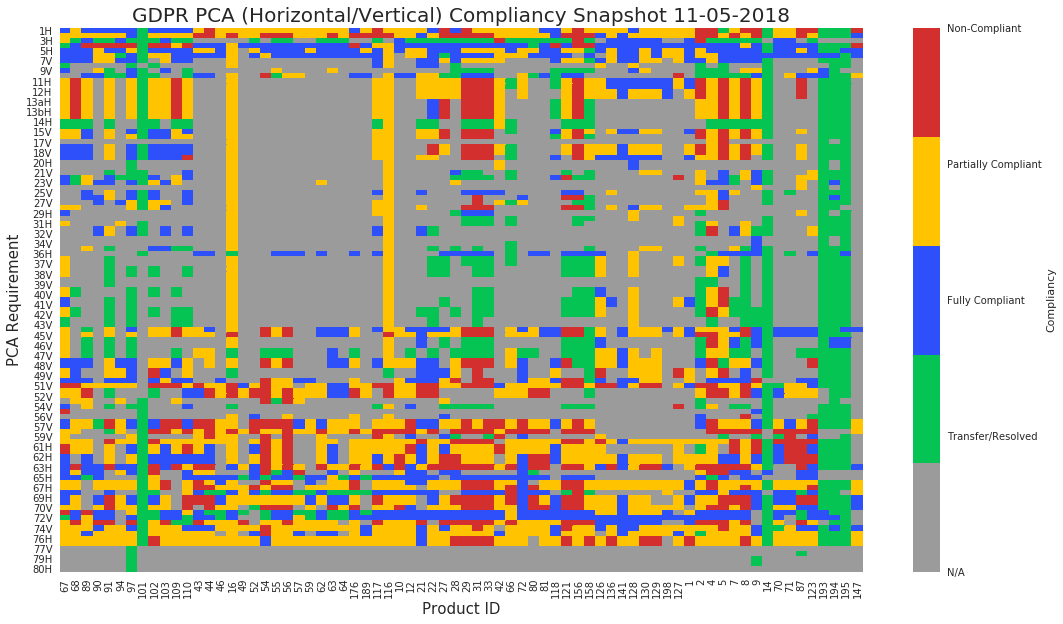

In [1561]:
f, ax = plt.subplots(figsize=(18, 10))
#f.colorbar
cmap=mcolors.ListedColormap([GREY,
                             GREEN,
                             BLUE,
                             AMBER,
                             RED])

zx = sns.heatmap(input_heatmap, ax=ax, square=False, vmin=1, vmax=5, cmap=cmap, cbar_kws={"orientation": "vertical","label": "Compliancy"})
title = "GDPR PCA (Horizontal/Vertical) Compliancy Snapshot "+today
plt.title(title, size=20)
plt.xlabel('Product ID', size=15)
plt.ylabel('PCA Requirement', size=15)
cbar = zx.collections[0].colorbar
cbar.set_ticks([1, 2, 3, 4, 5])
cbar.set_ticklabels(['N/A',
                     'Transfer/Resolved',
                     'Fully Compliant', 
                     'Partially Compliant', 
                     'Non-Compliant'])

f.savefig(OUTPUT_BASE_DIR+"/HV-Breakdown-Compliancy-Heatmap-"+today+".png")

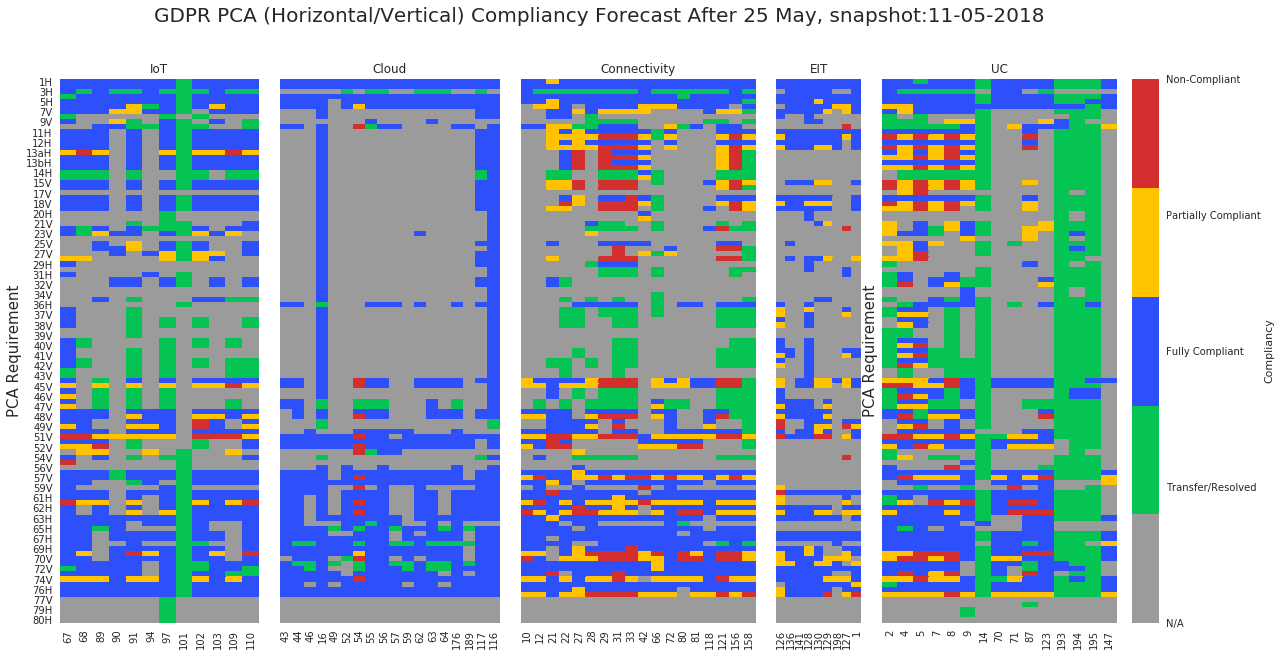

In [1562]:
forcast_heatmap.fillna(1,inplace=True)

baseline_iot_heatmap = forcast_heatmap[iot_cols]
baseline_cloud_heatmap = forcast_heatmap[cloud_cols]
baseline_connectivity_heatmap = forcast_heatmap[connectivity_cols]
baseline_eit_heatmap = forcast_heatmap[eit_cols]
baseline_uc_heatmap = forcast_heatmap[uc_cols]

f, (ax, ax1, ax2, ax3, ax4) = plt.subplots(ncols=5, sharex=False, sharey=True, figsize=(20, 10), 
                                           gridspec_kw={"width_ratios":[0.68,0.75,0.8,0.29,1]})
#f.colorbar
f.subplots_adjust(hspace=0.1,wspace=0.1)
#f.subplots_adjust(right=0.5)

BLACK = '#05111F'
DARKRED = '#B61A07'

#f.colorbar
cmap=mcolors.ListedColormap([GREY,
                             GREEN,
                             BLUE,
                             AMBER,
                             RED])


title = "GDPR PCA (Horizontal/Vertical) Compliancy Forecast After 25 May, snapshot:"+today
f.suptitle(title, size=20)


zx = sns.heatmap(baseline_iot_heatmap, ax=ax, square=False, vmin=1, vmax=5, cmap=cmap, cbar=False, yticklabels=True, xticklabels=True)

ax.set_title('IoT')
ax.set_ylabel('PCA Requirement', size=15)

zx1 = sns.heatmap(baseline_cloud_heatmap, ax=ax1, square=False, vmin=1, vmax=5, cmap=cmap, cbar=False, xticklabels=True)
ax1.set_title('Cloud')

zx2 = sns.heatmap(baseline_connectivity_heatmap, ax=ax2, square=False, vmin=1, vmax=5, cmap=cmap, cbar=False, xticklabels=True)
ax2.set_title('Connectivity')

zx3 = sns.heatmap(baseline_eit_heatmap, ax=ax3, square=False, vmin=1, vmax=5, cmap=cmap, cbar=False, xticklabels=True)
ax3.set_title('EIT')

zx4 = sns.heatmap(baseline_uc_heatmap, ax=ax4, square=False, vmin=1, vmax=5, cmap=cmap, xticklabels=True, cbar_kws={"orientation": "vertical","label": "Compliancy"})
ax4.set_title('UC')


plt.ylabel('PCA Requirement', size=15)
cbar = zx4.collections[0].colorbar
cbar.set_ticks([1, 2, 3, 4, 5])
cbar.set_ticklabels(['N/A',
                     'Transfer/Resolved',
                     'Fully Compliant', 
                     'Partially Compliant', 
                     'Non-Compliant'])

f.savefig(OUTPUT_BASE_DIR+"/HV-Breakdown-Compliancy-Forecast-Heatmap-"+today+".png")

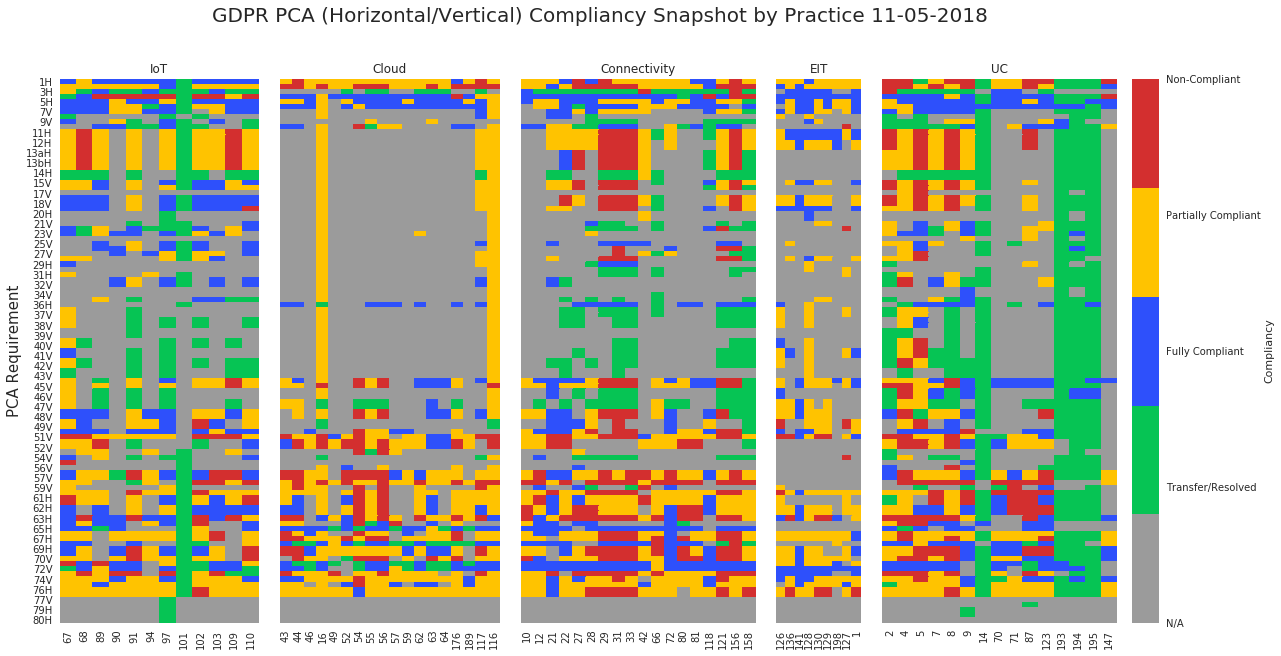

In [1563]:
# create subplots
iot_heatmap = input_heatmap[iot_cols]
cloud_heatmap = input_heatmap[cloud_cols]
connectivity_heatmap = input_heatmap[connectivity_cols]
eit_heatmap = input_heatmap[eit_cols]
uc_heatmap = input_heatmap[uc_cols]

f, (ax, ax1, ax2, ax3, ax4) = plt.subplots(ncols=5, sharex=False, sharey=True, figsize=(20, 10), 
                                           gridspec_kw={"width_ratios":[0.68,0.75,0.8,0.29,1]})
#f.colorbar
f.subplots_adjust(hspace=0.1,wspace=0.1)
#f.subplots_adjust(right=0.5)

cmap=mcolors.ListedColormap([GREY,
                             GREEN,
                             BLUE,
                             AMBER,
                             RED])

title = "GDPR PCA (Horizontal/Vertical) Compliancy Snapshot by Practice "+today
f.suptitle(title, size=20)


zx = sns.heatmap(iot_heatmap, ax=ax, square=False, vmin=1, vmax=5, cmap=cmap, cbar=False, yticklabels=True, xticklabels=True)
#zx1 = sns.heatmap(cloud_heatmap, ax=ax1, square=False, cmap=cmap, cbar=False)
ax.set_title('IoT')
ax.set_ylabel('PCA Requirement', size=15)

zx1 = sns.heatmap(cloud_heatmap, ax=ax1, square=False, vmin=1, vmax=5, cmap=cmap, cbar=False, xticklabels=True)
ax1.set_title('Cloud')

zx2 = sns.heatmap(connectivity_heatmap, ax=ax2, square=False, vmin=1, vmax=5, cmap=cmap, cbar=False, xticklabels=True)
ax2.set_title('Connectivity')

zx3 = sns.heatmap(eit_heatmap, ax=ax3, square=False, vmin=1, vmax=5, cmap=cmap, cbar=False, xticklabels=True)
ax3.set_title('EIT')


zx4 = sns.heatmap(uc_heatmap, ax=ax4, square=False, vmin=1, vmax=5, cmap=cmap, cbar_kws={"orientation": "vertical","label": "Compliancy"}, xticklabels=True)
ax4.set_title('UC')


#plt.annotate('Something', (0,0))
#plt.xlabel('Product ID', size=15)
#plt.ylabel('PCA Requirement', size=15)

cbar = zx4.collections[0].colorbar
cbar.set_ticks([1, 2, 3, 4, 5])
cbar.set_ticklabels(['N/A',
                     'Transfer/Resolved',
                     'Fully Compliant', 
                     'Partially Compliant', 
                     'Non-Compliant'])

#f.tight_layout(rect=[0, 0, 0.9, 0.9])

#cbar = zx1.collections[0].colorbar
#cbar.set_ticks([0, 1, 2, 3, 4, 5, 6])
#cbar.set_ticklabels(['0:Out of Scope from DPIA',
#                     '1:N/A', 
#                     '2:Fully Compliant', 
#                     '3:Partially Compliant f',
#                     '4:Partially Compliant', 
#                     '5:Non-Compliant f', 
#                     '6:Non-Compliant'])

f.savefig(OUTPUT_BASE_DIR+"/HV-Breakdown-Per-Practice-Heatmap-"+today+".png")

In [1564]:
# create burndowns
pca_df.head()

gap_counter = set([

    'PARTIALLY COMPLIANT ',
    'NON-COMPLIANT ',
    'PARTIALLY COMPLIANT f',
    'NON-COMPLIANT',
    'NON-COMPLIANT f',
    'PARTIALLY COMPLIANT']
)


#burndown_df = pd.DataFrame(index=['IoT','Cloud','Connectivity','EIT','UC', 'Total'], columns=[week_num])

#output_writer = pd.ExcelWriter('./burndown.xlsx')
#burndown_df.to_excel(output_writer, 'PCA Burndown')
#output_writer.save()


In [1565]:
#start_date = datetime.today()
#end_date = date(2018,6,1)


#end_date.strftime('%d-%m-%Y')
#end_date = end_date + timedelta(days=7)
#end_date.strftime('%d-%m-%Y')

In [1566]:
#start_date.strftime('%Y Week %W')

In [1567]:
iot_compliance = pca_df['Compliance Assessment'][pca_df['Practice']=='IoT'].value_counts()
cloud_compliance = pca_df['Compliance Assessment'][pca_df['Practice']=='Cloud'].value_counts()
connectivity_compliance = pca_df['Compliance Assessment'][pca_df['Practice']=='Connectivity'].value_counts()
eit_compliance = pca_df['Compliance Assessment'][pca_df['Practice']=='EIT'].value_counts()
uc_compliance = pca_df['Compliance Assessment'][pca_df['Practice']=='UC'].value_counts()

In [1568]:
iot_compliance

PARTIALLY COMPLIANT      768
NON-COMPLIANT            225
PARTIALLY COMPLIANT f    145
NON-COMPLIANT             17
PARTIALLY COMPLIANT       10
Name: Compliance Assessment, dtype: int64

In [1569]:
iot_gap = 0
cloud_gap = 0
connectivity_gap = 0
eit_gap = 0
uc_gap = 0

for key in iot_compliance.keys():
    if key in gap_counter:
        iot_gap = iot_gap + iot_compliance[key]

for key in cloud_compliance.keys():
    if key in gap_counter:
        cloud_gap = cloud_gap + cloud_compliance[key]

for key in connectivity_compliance.keys():
    if key in gap_counter:
        connectivity_gap = connectivity_gap + connectivity_compliance[key]

for key in eit_compliance.keys():
    if key in gap_counter:
        eit_gap = eit_gap + eit_compliance[key]

for key in uc_compliance.keys():
    if key in gap_counter:
        uc_gap = uc_gap + uc_compliance[key]

total_gap = iot_gap + cloud_gap + connectivity_gap + eit_gap + uc_gap
print total_gap

5768


In [1570]:
response_stats = response_heatmap.apply(pd.Series.value_counts)
response_stats.fillna(0,inplace=True)

In [1571]:
response_stats['Total'] = 0

for i in response_stats.index:
    response_stats.loc[i,'Total'] = response_stats.loc[i].sum()

response_stats['Response'] = ['N/A',
                             'Closed',
                             'Completed',
                             'Remediation in progress',
                             'Rejected',
                             'Acknowledged',
                             'No Response']

total_outstanding = response_stats.iloc[3:]['Total'].sum()

response_stats

,67,68,89,90,91,94,97,101,102,103,...,70,71,87,123,193,194,195,147,Total,Response
0,59.0,72.0,77.0,93.0,61.0,86.0,80.0,80.0,71.0,74.0,...,85.0,87.0,72.0,82.0,21.0,25.0,18.0,95.0,5153.0,N/A
1,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,6.0,1.0,5.0,1.0,0.0,0.0,0.0,1.0,76.0,Closed
2,2.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,350.0,Completed
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,211.0,Remediation in progress
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,7.0,1.0,0.0,0.0,0.0,0.0,2.0,114.0,Rejected
5,46.0,33.0,29.0,14.0,46.0,21.0,27.0,0.0,36.0,31.0,...,16.0,12.0,29.0,24.0,0.0,0.0,0.0,9.0,1280.0,Acknowledged
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,27.0,0.0,0.0,...,0.0,0.0,0.0,0.0,86.0,82.0,89.0,0.0,520.0,No Response


In [1572]:
response_stats.iloc[3:]['Total']

3     211.0
4     114.0
5    1280.0
6     520.0
Name: Total, dtype: float64

In [1573]:
cloud_cols

[43, 44, 46, 16, 49, 52, 54, 55, 56, 57, 59, 62, 63, 64, 176, 189, 117, 116]

In [1574]:
connectivity_cols

[10, 12, 21, 22, 27, 28, 29, 31, 33, 42, 66, 72, 80, 81, 118, 121, 156, 158]

In [1575]:
eit_cols

[126, 136, 141, 128, 130, 129, 198, 127, 1]

In [1576]:
uc_cols

[2, 4, 5, 7, 8, 9, 14, 70, 71, 87, 123, 193, 194, 195, 147]

In [1577]:
response_stats.drop(index=[0,1,2], inplace=True)
response_stats

,67,68,89,90,91,94,97,101,102,103,...,70,71,87,123,193,194,195,147,Total,Response
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,211.0,Remediation in progress
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,7.0,1.0,0.0,0.0,0.0,0.0,2.0,114.0,Rejected
5,46.0,33.0,29.0,14.0,46.0,21.0,27.0,0.0,36.0,31.0,...,16.0,12.0,29.0,24.0,0.0,0.0,0.0,9.0,1280.0,Acknowledged
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,27.0,0.0,0.0,...,0.0,0.0,0.0,0.0,86.0,82.0,89.0,0.0,520.0,No Response


In [1578]:
iot_response_stats = response_stats[iot_cols].copy()
iot_response_stats['Total'] = 0
for i in iot_response_stats.index:
    iot_response_stats.loc[i,'Total'] = iot_response_stats.loc[i].sum()

cloud_response_stats = response_stats[cloud_cols].copy()
cloud_response_stats['Total'] = 0
for i in cloud_response_stats.index:
    cloud_response_stats.loc[i,'Total'] = cloud_response_stats.loc[i].sum()

connectivity_response_stats = response_stats[connectivity_cols].copy()
connectivity_response_stats['Total'] = 0
for i in connectivity_response_stats.index:
    connectivity_response_stats.loc[i,'Total'] = connectivity_response_stats.loc[i].sum()

eit_response_stats = response_stats[eit_cols].copy()
eit_response_stats['Total'] = 0
for i in eit_response_stats.index:
    eit_response_stats.loc[i,'Total'] = eit_response_stats.loc[i].sum()

uc_response_stats = response_stats[uc_cols].copy()
uc_response_stats['Total'] = 0
for i in uc_response_stats.index:
    uc_response_stats.loc[i,'Total'] = uc_response_stats.loc[i].sum()
    
iot_outstanding = iot_response_stats['Total'].sum()
cloud_outstanding = cloud_response_stats['Total'].sum()
connectivity_outstanding = connectivity_response_stats['Total'].sum()
eit_outstanding = eit_response_stats['Total'].sum()
uc_outstanding = uc_response_stats['Total'].sum()

print iot_outstanding
print cloud_outstanding
print connectivity_outstanding
print eit_outstanding
print uc_outstanding

print iot_outstanding+cloud_outstanding+connectivity_outstanding+eit_outstanding+uc_outstanding

373.0
206.0
573.0
260.0
713.0
2125.0


In [1579]:
#response_stats.iloc[3:]['Total'].sum()
# only want to plot 3,4,5, and 6



total_outstanding

2125.0

In [1580]:
#burndown_df.head()

pca_burndown_df = pd.read_excel('./burndown.xlsx', sheet_name='PCA Burndown')
rolled_up_pca_burndown_df = pd.read_excel('./burndown.xlsx', sheet_name='PCA Burndown Rolled Up')
sca_burndown_df = pd.read_excel('./burndown.xlsx', sheet_name='SCA Burndown')
pca_status_burndown_df = pd.read_excel('./burndown.xlsx', sheet_name='PCA Status Burndown')

pca_burndown_df.columns.name = 'Week #'
pca_status_burndown_df.head(10)

,2018 Week 18,2018 Week 19
IoT,NaN,373
Cloud,NaN,206
Connectivity,NaN,573
EIT,NaN,260
UC,NaN,713
Total,2422.0,2125


In [1581]:
pca_status_burndown_df[week_num] = [iot_outstanding, cloud_outstanding, 
                                    connectivity_outstanding, eit_outstanding, 
                                    uc_outstanding, total_outstanding]
pca_status_burndown_df.head(6)

,2018 Week 18,2018 Week 19
IoT,NaN,373.0
Cloud,NaN,206.0
Connectivity,NaN,573.0
EIT,NaN,260.0
UC,NaN,713.0
Total,2422.0,2125.0


In [1582]:
pca_burndown_df[week_num] = [iot_gap, cloud_gap, connectivity_gap, eit_gap, uc_gap, total_gap]
pca_burndown_df[week_num]['Total']

5768

In [1583]:
list(pca_burndown_df.loc['Total'])

[5706, 5768]

In [1584]:
pca_burndown_df.head(10)


Week #,2018 Week 18,2018 Week 19
IoT,1165,1165
Cloud,579,579
Connectivity,2000,1976
EIT,300,300
UC,1662,1748
Total,5706,5768


In [1585]:
pca_rollup_target[27].value_counts()

1    36
4    16
3    12
5     8
2     8
Name: 27, dtype: int64

In [1586]:
pca_rollup_target.replace(to_replace=1, value=PCA_COMPLIANCE_INVERSE.get(1), inplace=True)
pca_rollup_target.replace(to_replace=2, value=PCA_COMPLIANCE_INVERSE.get(2), inplace=True)
pca_rollup_target.replace(to_replace=3, value=PCA_COMPLIANCE_INVERSE.get(3), inplace=True)
pca_rollup_target.replace(to_replace=4, value=PCA_COMPLIANCE_INVERSE.get(4), inplace=True)
pca_rollup_target.replace(to_replace=5, value=PCA_COMPLIANCE_INVERSE.get(5), inplace=True)

In [1587]:
new_compliancy_stats = pca_rollup_target.apply(pd.Series.value_counts)
new_compliancy_stats[27]

FULLY COMPLIANT        12
N/A                    36
NON-COMPLIANT           8
PARTIALLY COMPLIANT    16
RESOLVED/TRANSFERED     8
Name: 27, dtype: int64

In [1588]:
new_compliancy_stats.fillna(0, inplace=True)
new_compliancy_stats['Total'] = 0
new_compliancy_stats.loc['FULLY COMPLIANT', 'Total'] = new_compliancy_stats.loc['FULLY COMPLIANT'].sum()
new_compliancy_stats.loc['N/A', 'Total'] = new_compliancy_stats.loc['N/A'].sum()
new_compliancy_stats.loc['NON-COMPLIANT', 'Total'] = new_compliancy_stats.loc['NON-COMPLIANT'].sum()
new_compliancy_stats.loc['PARTIALLY COMPLIANT', 'Total'] = new_compliancy_stats.loc['PARTIALLY COMPLIANT'].sum()
new_compliancy_stats.loc['RESOLVED/TRANSFERED', 'Total'] = new_compliancy_stats.loc['RESOLVED/TRANSFERED'].sum()

iot_burndown_stats = new_compliancy_stats[iot_cols]
cloud_burndown_stats = new_compliancy_stats[cloud_cols]
connectivity_burndown_stats = new_compliancy_stats[connectivity_cols]
eit_burndown_stats = new_compliancy_stats[eit_cols]
uc_burndown_stats = new_compliancy_stats[uc_cols]


#for c in new_compliancy_stats.columns:
#    new_compliancy_stats.loc['Total',c] = new_compliancy_stats[c].sum()

#new_compliancy_stats.loc['Total','Total'] = new_compliancy_stats['Total'].sum()

new_compliancy_stats

,67,68,89,90,91,94,97,101,102,103,...,14,70,71,87,123,193,194,195,147,Total
FULLY COMPLIANT,21,13,18,13,8,8,24,0.0,14,18.0,...,2.0,13,10,10,19,5.0,6.0,4.0,8.0,790.0
N/A,21,36,36,52,23,52,19,29.0,28,38.0,...,17.0,53,52,39,40,13.0,15.0,12.0,62.0,2812.0
NON-COMPLIANT,4,6,3,2,7,1,2,0.0,8,7.0,...,0.0,2,5,11,8,0.0,0.0,0.0,2.0,462.0
PARTIALLY COMPLIANT,29,19,18,11,25,16,18,0.0,19,17.0,...,0.0,9,11,15,10,0.0,0.0,0.0,8.0,1107.0
RESOLVED/TRANSFERED,5,6,5,2,17,3,17,51.0,11,0.0,...,61.0,3,2,5,3,62.0,59.0,64.0,0.0,669.0


In [1589]:
iot_gap = iot_burndown_stats.loc['NON-COMPLIANT'].sum() + iot_burndown_stats.loc['PARTIALLY COMPLIANT'].sum()
cloud_gap = cloud_burndown_stats.loc['NON-COMPLIANT'].sum() + cloud_burndown_stats.loc['PARTIALLY COMPLIANT'].sum()
connectivity_gap = connectivity_burndown_stats.loc['NON-COMPLIANT'].sum() + connectivity_burndown_stats.loc['PARTIALLY COMPLIANT'].sum()
eit_gap = eit_burndown_stats.loc['NON-COMPLIANT'].sum() + eit_burndown_stats.loc['PARTIALLY COMPLIANT'].sum()
uc_gap = uc_burndown_stats.loc['NON-COMPLIANT'].sum() + uc_burndown_stats.loc['PARTIALLY COMPLIANT'].sum()

total_gap = iot_gap + cloud_gap + connectivity_gap + eit_gap + uc_gap

rolled_up_pca_burndown_df[week_num] = [iot_gap, cloud_gap, connectivity_gap, eit_gap, uc_gap, total_gap]
rolled_up_pca_burndown_df[week_num]['Total']

rolled_up_pca_burndown_df.fillna(0,inplace=True)
rolled_up_pca_burndown_df


,2018 Week 3,2018 Week 16,2018 Week 18,2018 Week 19
IoT,0,0,257,257.0
Cloud,0,0,407,407.0
Connectivity,0,0,428,428.0
EIT,0,0,188,188.0
UC,0,0,278,278.0
Total,2173,1687,1558,1558.0


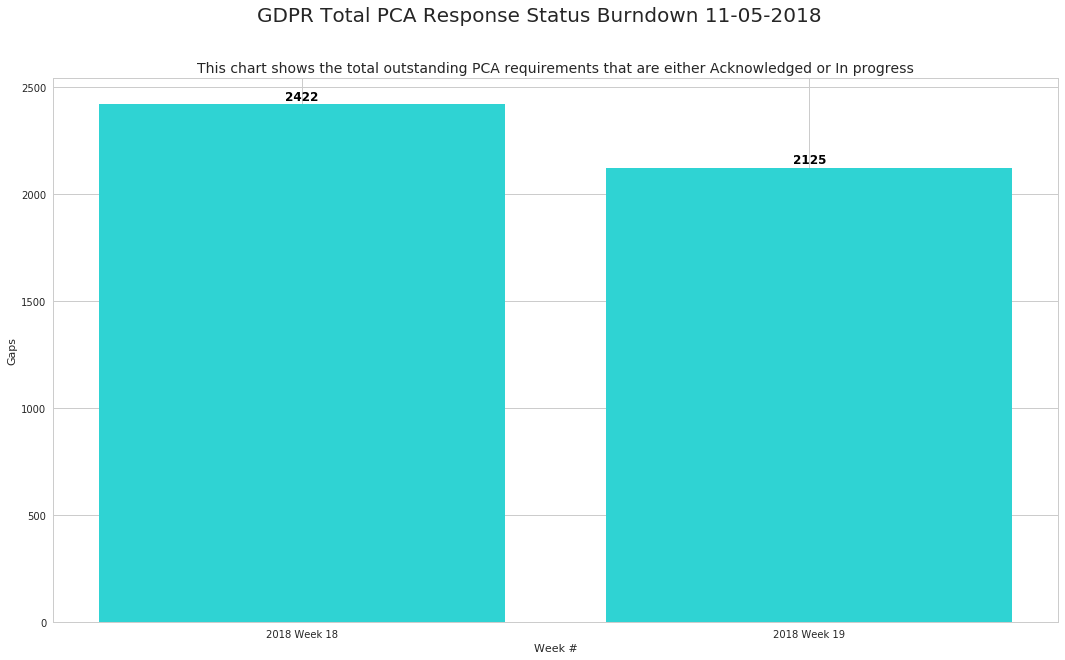

In [1590]:
f, ax = plt.subplots(figsize=(18, 10))
bars = list(pca_status_burndown_df.loc['Total'])
xticks = list(pca_status_burndown_df.columns)

#bar1.append(pca_burndown_df[today]['Total'])

#xticks.append(today)

font = {'family': 'sans serif',
        'color':  'black',
        'weight': 'bold',
        'size': 12,
        }

x= np.arange(len(bars))


plt.bar(x, bars, color='#2FD3D3')

for a,b in zip(x, bars):
    plt.text(a, b+20, str(int(b)), font, horizontalalignment='center')

plt.xticks(x, xticks)
plt.xlabel("Week #")
plt.ylabel("Gaps")
plt.suptitle("GDPR Total PCA Response Status Burndown "+today, size=20)
plt.title("This chart shows the total outstanding PCA requirements that are either Acknowledged or In progress", size=14)
f.savefig(OUTPUT_BASE_DIR+"/PCA-Response-Status-Burndown-"+today+".png")




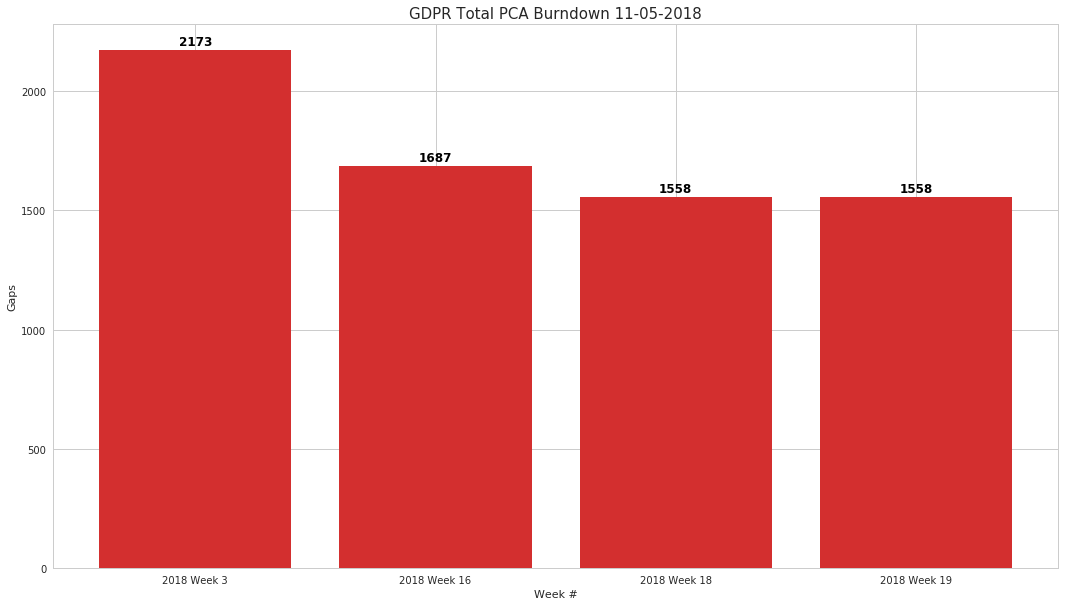

In [1591]:
f, ax = plt.subplots(figsize=(18, 10))
bars = list(rolled_up_pca_burndown_df.loc['Total'])
xticks = list(rolled_up_pca_burndown_df.columns)

#bar1.append(pca_burndown_df[today]['Total'])

#xticks.append(today)

font = {'family': 'sans serif',
        'color':  'black',
        'weight': 'bold',
        'size': 12,
        }

x= np.arange(len(bars))


plt.bar(x, bars, color=RED)

for a,b in zip(x, bars):
    plt.text(a, b+20, str(int(b)), font, horizontalalignment='center')

plt.xticks(x, xticks)
plt.xlabel("Week #")
plt.ylabel("Gaps")
plt.title("GDPR Total PCA Burndown "+today, size=15)
f.savefig(OUTPUT_BASE_DIR+"/PCA-Burndown-"+today+".png")

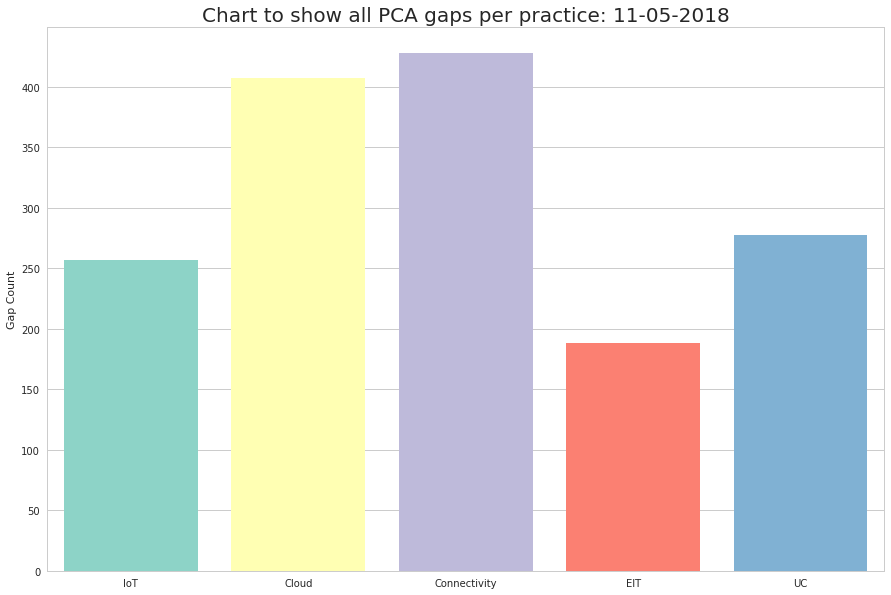

In [1592]:
fig, ax = plt.subplots(figsize=(15,10))

x = ['IoT', 'Cloud', 'Connectivity', 'EIT', 'UC']
y = [iot_gap, cloud_gap, connectivity_gap, eit_gap, uc_gap]

sns.barplot(x=x, y=y, saturation=1, palette='Set3')

ax.set_ylabel("Gap Count")
#ax.set_xlabel(today)
ax.set_title("Chart to show all PCA gaps per practice: "+today, size=20)
fig.savefig(OUTPUT_BASE_DIR+"/PCA-Burndown-Per-Practice-"+today+".png")

In [1593]:
sca_heatmap_df.head()

,67,68,89,90,91,94,97,101,102,103,...,9,14,70,71,87,123,193,194,195,147
9.2.1-A,3 - Partially adequate / Minor Non-Conformity ...,3 - Partially adequate / Minor Non-Conformity ...,3 - Partially adequate / Minor Non-Conformity ...,0 - n/a,3 - Partially adequate / Minor Non-Conformity ...,4 - Broadly adequate / Observation,4 - Broadly adequate / Observation,0 - n/a,4 - Broadly adequate / Observation,4 - Broadly adequate / Observation,...,0 - n/a,4 - Broadly adequate / Observation,3 - Partially adequate / Minor Non-Conformity ...,4 - Broadly adequate / Observation,0 - n/a,3 - Partially adequate / Minor Non-Conformity ...,0 - n/a,4 - Broadly adequate / Observation,0 - n/a,4 - Broadly adequate / Observation
9.2.2,3 - Partially adequate / Minor Non-Conformity ...,3 - Partially adequate / Minor Non-Conformity ...,3 - Partially adequate / Minor Non-Conformity ...,0 - n/a,3 - Partially adequate / Minor Non-Conformity ...,4 - Broadly adequate / Observation,4 - Broadly adequate / Observation,0 - n/a,4 - Broadly adequate / Observation,4 - Broadly adequate / Observation,...,3 - Partially adequate / Minor Non-Conformity ...,0 - n/a,0 - n/a,0 - n/a,0 - n/a,0 - n/a,0 - n/a,0 - n/a,0 - n/a,4 - Broadly adequate / Observation
9.2.3,3 - Partially adequate / Minor Non-Conformity ...,3 - Partially adequate / Minor Non-Conformity ...,3 - Partially adequate / Minor Non-Conformity ...,0 - n/a,2 - Inadequate / Minor Non-Conformity (high se...,4 - Broadly adequate / Observation,4 - Broadly adequate / Observation,0 - n/a,4 - Broadly adequate / Observation,4 - Broadly adequate / Observation,...,4 - Broadly adequate / Observation,0 - n/a,0 - n/a,0 - n/a,0 - n/a,0 - n/a,0 - n/a,0 - n/a,0 - n/a,4 - Broadly adequate / Observation
9.2.5,3 - Partially adequate / Minor Non-Conformity ...,3 - Partially adequate / Minor Non-Conformity ...,3 - Partially adequate / Minor Non-Conformity ...,0 - n/a,2 - Inadequate / Minor Non-Conformity (high se...,4 - Broadly adequate / Observation,4 - Broadly adequate / Observation,0 - n/a,4 - Broadly adequate / Observation,4 - Broadly adequate / Observation,...,2 - Inadequate / Minor Non-Conformity (high se...,4 - Broadly adequate / Observation,3 - Partially adequate / Minor Non-Conformity ...,0 - n/a,4 - Broadly adequate / Observation,3 - Partially adequate / Minor Non-Conformity ...,0 - n/a,4 - Broadly adequate / Observation,0 - n/a,4 - Broadly adequate / Observation
9.2.6-A,3 - Partially adequate / Minor Non-Conformity ...,3 - Partially adequate / Minor Non-Conformity ...,3 - Partially adequate / Minor Non-Conformity ...,0 - n/a,2 - Inadequate / Minor Non-Conformity (high se...,3 - Partially adequate / Minor Non-Conformity ...,3 - Partially adequate / Minor Non-Conformity ...,0 - n/a,3 - Partially adequate / Minor Non-Conformity ...,3 - Partially adequate / Minor Non-Conformity ...,...,2 - Inadequate / Minor Non-Conformity (high se...,4 - Broadly adequate / Observation,2 - Inadequate / Minor Non-Conformity (high se...,0 - n/a,0 - n/a,2 - Inadequate / Minor Non-Conformity (high se...,0 - n/a,4 - Broadly adequate / Observation,0 - n/a,4 - Broadly adequate / Observation


In [1594]:
sca_forcast_heatmap = sca_heatmap_df.copy()
sca_forcast_heatmap.head()

,67,68,89,90,91,94,97,101,102,103,...,9,14,70,71,87,123,193,194,195,147
9.2.1-A,3 - Partially adequate / Minor Non-Conformity ...,3 - Partially adequate / Minor Non-Conformity ...,3 - Partially adequate / Minor Non-Conformity ...,0 - n/a,3 - Partially adequate / Minor Non-Conformity ...,4 - Broadly adequate / Observation,4 - Broadly adequate / Observation,0 - n/a,4 - Broadly adequate / Observation,4 - Broadly adequate / Observation,...,0 - n/a,4 - Broadly adequate / Observation,3 - Partially adequate / Minor Non-Conformity ...,4 - Broadly adequate / Observation,0 - n/a,3 - Partially adequate / Minor Non-Conformity ...,0 - n/a,4 - Broadly adequate / Observation,0 - n/a,4 - Broadly adequate / Observation
9.2.2,3 - Partially adequate / Minor Non-Conformity ...,3 - Partially adequate / Minor Non-Conformity ...,3 - Partially adequate / Minor Non-Conformity ...,0 - n/a,3 - Partially adequate / Minor Non-Conformity ...,4 - Broadly adequate / Observation,4 - Broadly adequate / Observation,0 - n/a,4 - Broadly adequate / Observation,4 - Broadly adequate / Observation,...,3 - Partially adequate / Minor Non-Conformity ...,0 - n/a,0 - n/a,0 - n/a,0 - n/a,0 - n/a,0 - n/a,0 - n/a,0 - n/a,4 - Broadly adequate / Observation
9.2.3,3 - Partially adequate / Minor Non-Conformity ...,3 - Partially adequate / Minor Non-Conformity ...,3 - Partially adequate / Minor Non-Conformity ...,0 - n/a,2 - Inadequate / Minor Non-Conformity (high se...,4 - Broadly adequate / Observation,4 - Broadly adequate / Observation,0 - n/a,4 - Broadly adequate / Observation,4 - Broadly adequate / Observation,...,4 - Broadly adequate / Observation,0 - n/a,0 - n/a,0 - n/a,0 - n/a,0 - n/a,0 - n/a,0 - n/a,0 - n/a,4 - Broadly adequate / Observation
9.2.5,3 - Partially adequate / Minor Non-Conformity ...,3 - Partially adequate / Minor Non-Conformity ...,3 - Partially adequate / Minor Non-Conformity ...,0 - n/a,2 - Inadequate / Minor Non-Conformity (high se...,4 - Broadly adequate / Observation,4 - Broadly adequate / Observation,0 - n/a,4 - Broadly adequate / Observation,4 - Broadly adequate / Observation,...,2 - Inadequate / Minor Non-Conformity (high se...,4 - Broadly adequate / Observation,3 - Partially adequate / Minor Non-Conformity ...,0 - n/a,4 - Broadly adequate / Observation,3 - Partially adequate / Minor Non-Conformity ...,0 - n/a,4 - Broadly adequate / Observation,0 - n/a,4 - Broadly adequate / Observation
9.2.6-A,3 - Partially adequate / Minor Non-Conformity ...,3 - Partially adequate / Minor Non-Conformity ...,3 - Partially adequate / Minor Non-Conformity ...,0 - n/a,2 - Inadequate / Minor Non-Conformity (high se...,3 - Partially adequate / Minor Non-Conformity ...,3 - Partially adequate / Minor Non-Conformity ...,0 - n/a,3 - Partially adequate / Minor Non-Conformity ...,3 - Partially adequate / Minor Non-Conformity ...,...,2 - Inadequate / Minor Non-Conformity (high se...,4 - Broadly adequate / Observation,2 - Inadequate / Minor Non-Conformity (high se...,0 - n/a,0 - n/a,2 - Inadequate / Minor Non-Conformity (high se...,0 - n/a,4 - Broadly adequate / Observation,0 - n/a,4 - Broadly adequate / Observation


In [1595]:
#output_writer = pd.ExcelWriter('./burndown.xlsx')
#burndown_df.to_excel(output_writer, 'PCA Burndown')
#output_writer.save()
sca_forcast_heatmap.replace(to_replace=list(SCA_COMPLIANCE.keys()), value=list(SCA_COMPLIANCE.values()), inplace=True)
#sca_forcast_heatmap.replace(to_replace=[1,2,3,4,5], value=[6,6,6,6,6], inplace=True)
sca_forcast_heatmap.head()

,67,68,89,90,91,94,97,101,102,103,...,9,14,70,71,87,123,193,194,195,147
9.2.1-A,3,3,3,0,3,4,4,0,4,4,...,0,4,3,4,0,3,0,4,0,4
9.2.2,3,3,3,0,3,4,4,0,4,4,...,3,0,0,0,0,0,0,0,0,4
9.2.3,3,3,3,0,2,4,4,0,4,4,...,4,0,0,0,0,0,0,0,0,4
9.2.5,3,3,3,0,2,4,4,0,4,4,...,2,4,3,0,4,3,0,4,0,4
9.2.6-A,3,3,3,0,2,3,3,0,3,3,...,2,4,2,0,0,2,0,4,0,4


# SCA Heatmap Data

In [1596]:
for p in COLS:
    prod_filter = sca_df['Product ID'] == p
    prod_df = sca_df[prod_filter]
    
    for r in prod_df['Req Ref']:
        if p == 193:
            sca = r[12:-2]
        else:
            sca = r[11:-2]

        #if p == 101:
            #print sca
            #print prod_df[prod_df['Req Ref'] == r]['Compliance Assessment'].iloc[0]
            #print sca_heatmap_df.loc[sca][p]
        
        if sca in SCA_INDEX:
            compliance_value = SCA_COMPLIANCE.get(prod_df[prod_df['Req Ref'] == r]['Compliance Assessment'].iloc[0], 10)
            
            response_value = RESPONSE_TYPES.get(prod_df[prod_df['Req Ref'] == r]['Response'].iloc[0], 10)
            
            forecast_value = SCA_COMPLIANCE.get(sca_forcast_heatmap_df[sca_forcast_heatmap_df['Req Ref'] == r]['Compliance Assessment'].iloc[0], 10)

            if p == 193:
                if sca == '9.4.2':
                    print compliance_value
                    print forecast_value
                    print SCA_COMPLIANCE.get(sca_heatmap_df.loc[sca][p], 0)
                    print sca_forcast_heatmap.loc[sca][p]
            
            if SCA_COMPLIANCE.get(sca_heatmap_df.loc[sca][p], 0) == 0:
                sca_forcast_heatmap.loc[sca][p] = SCA_COMPLIANCE.get(sca_heatmap_df.loc[sca][p], 0)
            elif ((forecast_value < compliance_value) or (compliance_value == 0)):
                sca_forcast_heatmap.loc[sca][p] = compliance_value
            else:
                sca_forcast_heatmap.loc[sca][p] = forecast_value
            
            
            if response_value < sca_response_heatmap_df.loc[sca][p]:
                sca_response_heatmap_df.loc[sca][p] = response_value

            if SCA_COMPLIANCE.get(sca_heatmap_df.loc[sca][p], 0) > compliance_value:
                sca_heatmap_df.loc[sca][p] = prod_df[prod_df['Req Ref'] == r]['Compliance Assessment'].iloc[0]
            #else:
                #print("2: Compliance Value: {0:s}".format(prod_df[prod_df['Req Ref'] == r]['Compliance Assessment'].iloc[0]))
                #print("2: Heatmap Value: {0}".format(sca_heatmap_df.loc[sca][p]))
                #sys.exit("EXIT")
            
            #print r
            #print heatmap_df.loc[r][p]
        else:
            if sca in converter.keys():
                print "not in index"
                sca_heatmap_df.loc[converter.get(sca)][p] = prod_df[prod_df['Req Ref'] == r]['Compliance Assessment'].iloc[0]
                if response_value < sca_response_heatmap_df.loc[sca][p]:
                    sca_response_heatmap_df.loc[sca][p] = response_value
                    
                
                forecast_value = SCA_COMPLIANCE.get(sca_forcast_heatmap_df[sca_forcast_heatmap_df['Req Ref'] == r]['Compliance Assessment'].iloc[0], 10)

                if ((forecast_value < compliance_value) or (compliance_value == 0)):
                    sca_forcast_heatmap.loc[sca][p] = compliance_value
                else:
                    sca_forcast_heatmap.loc[sca][p] = forecast_value

            else:
                print("Req nr not in index: {0}".format(r))
                if sca == 13:
                    sca_heatmap_df.loc['13aV'][p] = prod_df[prod_df['Req Ref'] == r]['Compliance Assessment'].iloc[0]
                    sca_heatmap_df.loc['13bV'][p] = prod_df[prod_df['Req Ref'] == r]['Compliance Assessment'].iloc[0]
 
                compliance_value = SCA_COMPLIANCE.get(prod_df[prod_df['Req Ref'] == r]['Compliance Assessment'].iloc[0], 10)

                if response_value < sca_response_heatmap_df.loc[sca][p]:
                    sca_response_heatmap_df.loc[sca][p] = response_value
                    
                forecast_value = SCA_COMPLIANCE.get(sca_forcast_heatmap_df[sca_forcast_heatmap_df['Req Ref'] == r]['Compliance Assessment'].iloc[0], 10)

                if ((forecast_value < compliance_value) or (compliance_value == 0)):
                    sca_forcast_heatmap.loc[sca][p] = compliance_value
                else:
                    sca_forcast_heatmap.loc[sca][p] = forecast_value
                    
            

4
4
0
0


In [1597]:
sca_forcast_heatmap_df.head()

,Compliance Assessment,Delivery Date,Entity Count,Filename,Product ID,Remediation Project Ref,Req Ref,Req nr,Response,Response Comments,Product Ref,Category,Orphan,Practice,Risk Category,Approved by DPO:,"If Approved, change to ?",New Comment to be inserted into RS and DPIA
26,3 - Partially adequate / Minor Non-Conformity ...,2018-10-30,3.0,GDPR-RS-EPS072-VSDM-Airwatch-V5.0 RI RELEASED....,72,No Response,EPS072-SCA-9.2.5-A,9.2.5,Acknowledged,Analysing SSO implementation,EPS072-SCA-9.2.5,SCA,No Project Code,Connectivity,UNKNOWN,NaN,NaN,NaN
27,3 - Partially adequate / Minor Non-Conformity ...,2018-10-30,3.0,GDPR-RS-EPS072-VSDM-Airwatch-V5.0 RI RELEASED....,72,No Response,EPS072-SCA-9.2.6-A-A,9.2.6-A,Acknowledged,Analysing SSO implementation,EPS072-SCA-9.2.6-A,SCA,No Project Code,Connectivity,UNKNOWN,NaN,NaN,NaN
28,3 - Partially adequate / Minor Non-Conformity ...,2018-10-30,3.0,GDPR-RS-EPS072-VSDM-Airwatch-V5.0 RI RELEASED....,72,No Response,EPS072-SCA-9.2.6-B-A,9.2.6-B,Acknowledged,Analysing SSO implementation,EPS072-SCA-9.2.6-B,SCA,No Project Code,Connectivity,UNKNOWN,NaN,NaN,NaN
29,3 - Partially adequate / Minor Non-Conformity ...,2018-10-30,3.0,GDPR-RS-EPS072-VSDM-Airwatch-V5.0 RI RELEASED....,72,No Response,EPS072-SCA-18.1.4-A,18.1.4,Acknowledged,Ask Security,EPS072-SCA-18.1.4,SCA,No Project Code,Connectivity,UNKNOWN,NaN,NaN,NaN
30,4 - Broadly adequate / Observation,2018-10-30,3.0,GDPR-RS-EPS072-VSDM-Airwatch-V5.0 RI RELEASED....,72,No Response,EPS072-SCA-9.2.1-A-A,9.2.1-A,Acknowledged,Ask Security,EPS072-SCA-9.2.1-A,SCA,No Project Code,Connectivity,UNKNOWN,NaN,NaN,NaN


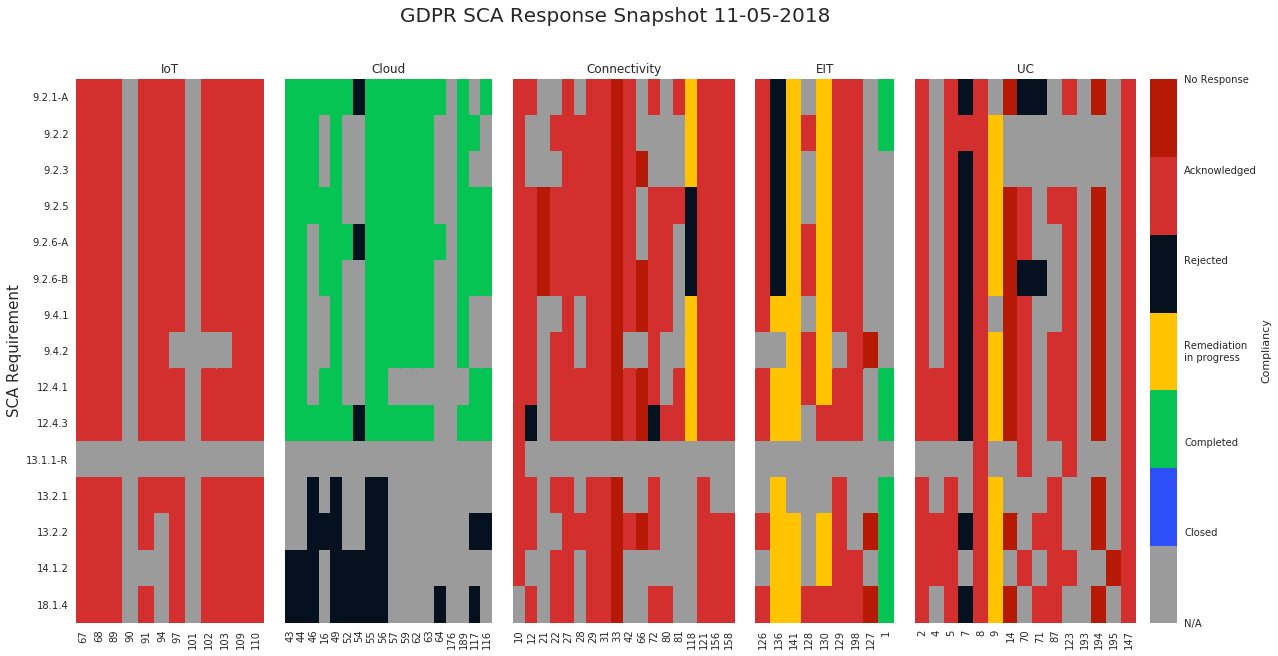

In [1598]:
# create subplots
iot_heatmap = sca_response_heatmap_df[iot_cols]
cloud_heatmap = sca_response_heatmap_df[cloud_cols]
connectivity_heatmap = sca_response_heatmap_df[connectivity_cols]
eit_heatmap = sca_response_heatmap_df[eit_cols]
uc_heatmap = sca_response_heatmap_df[uc_cols]

f, (ax, ax1, ax2, ax3, ax4) = plt.subplots(ncols=5, sharex=False, sharey=True, figsize=(20, 10), 
                                           gridspec_kw={"width_ratios":[0.68,0.75,0.8,0.5,1]})
#f.colorbar
f.subplots_adjust(hspace=0.1,wspace=0.1)
#f.subplots_adjust(right=0.5)

BLACK = '#05111F'
DARKRED = '#B61A07'

cmap=mcolors.ListedColormap([GREY,
                             BLUE,
                             GREEN,
                             AMBER,
                             BLACK,
                             RED,
                             DARKRED])

title = "GDPR SCA Response Snapshot "+today

zx = sns.heatmap(iot_heatmap, ax=ax, square=False, vmin=0, vmax=6, cmap=cmap, cbar=False, yticklabels=True, xticklabels=True)
#zx1 = sns.heatmap(cloud_heatmap, ax=ax1, square=False, cmap=cmap, cbar=False)
ax.set_title('IoT')
ax.set_ylabel('SCA Requirement', size=15)

zx1 = sns.heatmap(cloud_heatmap, ax=ax1, square=False, vmin=0, vmax=6, cmap=cmap, cbar=False, xticklabels=True)
ax1.set_title('Cloud')

zx2 = sns.heatmap(connectivity_heatmap, ax=ax2, square=False, vmin=0, vmax=6, cmap=cmap, cbar=False, xticklabels=True)
ax2.set_title('Connectivity')

zx3 = sns.heatmap(eit_heatmap, ax=ax3, square=False, cmap=cmap, vmin=0, vmax=6, cbar=False, xticklabels=True)
ax3.set_title('EIT')


zx4 = sns.heatmap(uc_heatmap, ax=ax4, square=False, vmin=0, vmax=6, cmap=cmap, cbar_kws={"orientation": "vertical","label": "Compliancy"}, xticklabels=True)
ax4.set_title('UC')


plt.suptitle(title, size=20)
cbar = zx4.collections[0].colorbar
cbar.set_ticks([0, 1, 2, 3, 4, 5, 6])
cbar.set_ticklabels(['N/A',
                     'Closed',
                     'Completed',
                     'Remediation \nin progress',
                     'Rejected',
                     'Acknowledged',
                     'No Response'])

f.savefig(OUTPUT_BASE_DIR+"/SCA-Response-Heatmap-"+today+".png")

In [1599]:

sca_compliancy_stats = sca_heatmap_df.apply(pd.Series.value_counts)

sca_compliancy_stats.fillna(0, inplace=True)
sca_compliancy_stats['Total'] = 0
sca_compliancy_stats.loc['1 - Very Inadequate / Major Non-Conformity', 'Total'] = sca_compliancy_stats.loc['1 - Very Inadequate / Major Non-Conformity'].sum()
sca_compliancy_stats.loc['2 - Inadequate / Minor Non-Conformity (high severity)', 'Total'] = sca_compliancy_stats.loc['2 - Inadequate / Minor Non-Conformity (high severity)'].sum()
sca_compliancy_stats.loc['3 - Partially adequate / Minor Non-Conformity (low severity)', 'Total'] = sca_compliancy_stats.loc['3 - Partially adequate / Minor Non-Conformity (low severity)'].sum()
sca_compliancy_stats.loc['4 - Broadly adequate / Observation', 'Total'] = sca_compliancy_stats.loc['4 - Broadly adequate / Observation'].sum()

iot_sca_burndown_stats = sca_compliancy_stats[iot_cols]
cloud_sca_burndown_stats = sca_compliancy_stats[cloud_cols]
connectivity_sca_burndown_stats = sca_compliancy_stats[connectivity_cols]
eit_sca_burndown_stats = sca_compliancy_stats[eit_cols]
uc_sca_burndown_stats = sca_compliancy_stats[uc_cols]

iot_gap = iot_sca_burndown_stats.loc['1 - Very Inadequate / Major Non-Conformity'].sum() + \
        iot_sca_burndown_stats.loc['2 - Inadequate / Minor Non-Conformity (high severity)'].sum() + \
        iot_sca_burndown_stats.loc['3 - Partially adequate / Minor Non-Conformity (low severity)'].sum() #+ \
        #iot_sca_burndown_stats.loc['4 - Broadly adequate / Observation'].sum()
                                    
cloud_gap = cloud_sca_burndown_stats.loc['1 - Very Inadequate / Major Non-Conformity'].sum() + \
        cloud_sca_burndown_stats.loc['2 - Inadequate / Minor Non-Conformity (high severity)'].sum() + \
        cloud_sca_burndown_stats.loc['3 - Partially adequate / Minor Non-Conformity (low severity)'].sum() #+ \
        #cloud_sca_burndown_stats.loc['4 - Broadly adequate / Observation'].sum()
        
connectivity_gap = connectivity_sca_burndown_stats.loc['1 - Very Inadequate / Major Non-Conformity'].sum() + \
        connectivity_sca_burndown_stats.loc['2 - Inadequate / Minor Non-Conformity (high severity)'].sum() + \
        connectivity_sca_burndown_stats.loc['3 - Partially adequate / Minor Non-Conformity (low severity)'].sum() #+ \
        #connectivity_sca_burndown_stats.loc['4 - Broadly adequate / Observation'].sum()

eit_gap = eit_sca_burndown_stats.loc['1 - Very Inadequate / Major Non-Conformity'].sum() + \
        eit_sca_burndown_stats.loc['2 - Inadequate / Minor Non-Conformity (high severity)'].sum() + \
        eit_sca_burndown_stats.loc['3 - Partially adequate / Minor Non-Conformity (low severity)'].sum() #+ \
        #eit_sca_burndown_stats.loc['4 - Broadly adequate / Observation'].sum()

uc_gap = uc_sca_burndown_stats.loc['1 - Very Inadequate / Major Non-Conformity'].sum() + \
        uc_sca_burndown_stats.loc['2 - Inadequate / Minor Non-Conformity (high severity)'].sum() + \
        uc_sca_burndown_stats.loc['3 - Partially adequate / Minor Non-Conformity (low severity)'].sum() #+ \
        #uc_sca_burndown_stats.loc['4 - Broadly adequate / Observation'].sum()


total_gap = iot_gap + cloud_gap + connectivity_gap + eit_gap + uc_gap

sca_burndown_df[week_num] = [iot_gap, cloud_gap, connectivity_gap, eit_gap, uc_gap, total_gap]
sca_burndown_df[week_num]['Total']

sca_burndown_df.fillna(0,inplace=True)



In [1600]:
sca_compliancy_stats

,67,68,89,90,91,94,97,101,102,103,...,14,70,71,87,123,193,194,195,147,Total
0 - n/a,1.0,1.0,1.0,15.0,2.0,4.0,2.0,15.0,2.0,2.0,...,5.0,5.0,11.0,7.0,5.0,15.0,4.0,14.0,0.0,0.0
1 - Very Inadequate / Major Non-Conformity,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,24.0
2 - Inadequate / Minor Non-Conformity (high severity),1.0,1.0,2.0,0.0,9.0,0.0,0.0,0.0,0.0,0.0,...,0.0,2.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,104.0
3 - Partially adequate / Minor Non-Conformity (low severity),7.0,7.0,12.0,0.0,4.0,1.0,5.0,0.0,5.0,5.0,...,0.0,2.0,0.0,0.0,2.0,0.0,3.0,0.0,0.0,205.0
4 - Broadly adequate / Observation,6.0,6.0,0.0,0.0,0.0,10.0,8.0,0.0,8.0,8.0,...,10.0,6.0,4.0,8.0,6.0,0.0,8.0,1.0,15.0,383.0
5 - Substantially adequate / Compliant,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [1601]:
sca_burndown_df

,2018 Week 3,2018 Week 16,2018 Week 18,2018 Week 19
IoT,0,0,84,84.0
Cloud,0,0,89,89.0
Connectivity,0,0,97,97.0
EIT,0,0,32,32.0
UC,0,0,30,30.0
Total,0,327,332,332.0


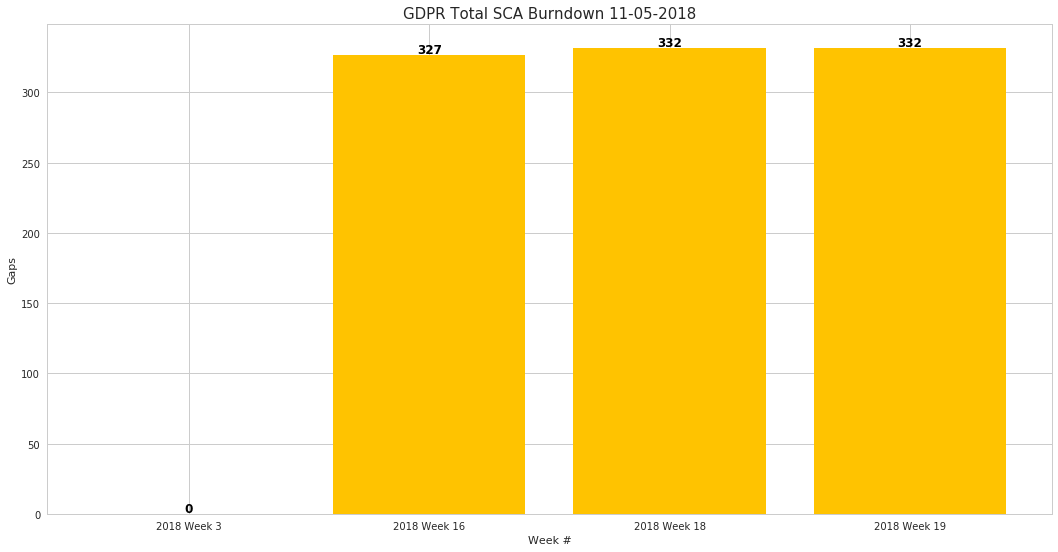

In [1602]:
f, ax = plt.subplots(figsize=(18, 10))
f.subplots_adjust(bottom=0.2,hspace=0.5,wspace=0.5)

bars = list(sca_burndown_df.loc['Total'])
xticks = list(sca_burndown_df.columns)

#bar1.append(pca_burndown_df[today]['Total'])

#xticks.append(today)

DARK_BLUE = '#0B3360'

font = {'family': 'sans serif',
        'color':  'black',
        'weight': 'bold',
        'size': 12,
        }

x= np.arange(len(bars))


plt.bar(x, bars, color=AMBER)

for a,b in zip(x, bars):
    plt.text(a, b+1, str(int(b)), font, horizontalalignment='center')

plt.xticks(x, xticks)
plt.xlabel("Week #")
plt.ylabel("Gaps")
plt.title("GDPR Total SCA Burndown "+today, size=15)
f.savefig(OUTPUT_BASE_DIR+"/SCA-Burndown-"+today+".png")

In [1603]:
output_writer = pd.ExcelWriter('./burndown.xlsx')
pca_burndown_df.to_excel(output_writer, 'PCA Burndown')
rolled_up_pca_burndown_df.to_excel(output_writer, 'PCA Burndown Rolled Up')
sca_burndown_df.to_excel(output_writer, 'SCA Burndown')
pca_status_burndown_df.to_excel(output_writer, 'PCA Status Burndown')
output_writer.save()

In [1604]:
COLUMNS = ['PRIVACY_REQUIREMENT_CONTENT', 'REQ_NO', 'VERTICAL', 'HORIZONTAL', 'HYBRID', 'PC', 'NC']

INDEX = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J']

set_a = set(['1H','2H','3H'])
set_b = set(['4H','5H','6V','7V','8H'])
set_c = set(['9V','10V'])
set_d = set(['11H','11V','12H','12V','13aH','13aV','13bH','13bV','14H','14V','15V','16V','17V','18H','18V','19V','20H','20V'])
set_e = set(['21V','22V','23V','24V','25V','26V','27V','28V','29H','30H','31H','32H','32V','33V','34V','35H','36H','37H','37V','38H',
             '38V','39H','39V','40H','40V','41H','41V','42H','42V','43H','43V'])
set_f = set(['44V','45V','46H','46V','47H','47V','48H','48V','49H','49V','50H','51V','52H','52V','53V','54V','55V','56V','57H','57V','58H'])
set_g = set(['59V','60H','61H','61V','62H','62V','63H','64H','65H','66H','67H','68H','69H','69V','70V','71V','72V','73H'])
set_h = set(['74V','75H','76H','76V','77V'])
set_i = set(['78V','79H','79V','80H'])

requirement_content = ['Define privacy responsibilities, document the data being processed, \
conduct privacy risk assessments and control identification (Privacy by Design), and ensure business accountability \
for implementation of controls and residual risks',
                      'Collection and purpose limitation',
                      'Protect confidentiality of communications and sensitive information',
                      'Provide a clear and understandable privacy notice',
                      'Obtain and manage necessary permissions for processing communications content, \
                      traffic data, location data, marketing, analytics and processing of sensitive data',
                      'Manage data diligently to maintain its accuracy and quality across product life cycle, not \
                      retain data for longer than is necessary and ensure rights and obligations related to data carry \
                      over to all instances of data',
                      'Design product to enable data subject’s right to access data, request deletion and data portability',
                      'Do not disclose personal data to unauthorized governmental agencies and ensure suppliers comply with \
                      Vodafone privacy and security requirements',
                      'Apply effective technical and organisational controls to protect personal data against unauthorized access, \
                      use, disclosure, modification or loss ',
                      'Acquire parental consents when providing information society services (online services) directly to children, use child appropriate language, \
                      avoid profiling of children and protect child personal data against unwanted disclosure']

vertical = [15, ]

all_risk_df = pd.DataFrame(columns=COLUMNS, index=INDEX)

all_risk_df['PRIVACY_REQUIREMENT_CONTENT'] = requirement_content

In [1605]:
PCA_COMPLIANCE_INVERSE.get(input_heatmap.loc['1H'][67])

'FULLY COMPLIANT'

In [1606]:
all_risk_df

,PRIVACY_REQUIREMENT_CONTENT,REQ_NO,VERTICAL,HORIZONTAL,HYBRID,PC,NC
A,"Define privacy responsibilities, document the ...",NaN,NaN,NaN,NaN,NaN,NaN
B,Collection and purpose limitation,NaN,NaN,NaN,NaN,NaN,NaN
C,Protect confidentiality of communications and ...,NaN,NaN,NaN,NaN,NaN,NaN
D,Provide a clear and understandable privacy notice,NaN,NaN,NaN,NaN,NaN,NaN
E,Obtain and manage necessary permissions for pr...,NaN,NaN,NaN,NaN,NaN,NaN
F,Manage data diligently to maintain its accurac...,NaN,NaN,NaN,NaN,NaN,NaN
G,Design product to enable data subject’s right ...,NaN,NaN,NaN,NaN,NaN,NaN
H,Do not disclose personal data to unauthorized ...,NaN,NaN,NaN,NaN,NaN,NaN
I,Apply effective technical and organisational c...,NaN,NaN,NaN,NaN,NaN,NaN
J,Acquire parental consents when providing infor...,NaN,NaN,NaN,NaN,NaN,NaN


In [1607]:
sca_heatmap_df.replace(to_replace='0 - n/a', value=0, inplace=True)
sca_heatmap_df.replace(to_replace='1 - Very Inadequate / Major Non-Conformity', value=1, inplace=True)
sca_heatmap_df.replace(to_replace='2 - Inadequate / Minor Non-Conformity (high severity)', value=2, inplace=True)
sca_heatmap_df.replace(to_replace='3 - Partially adequate / Minor Non-Conformity (low severity)', value=3, inplace=True)
sca_heatmap_df.replace(to_replace='4 - Broadly adequate / Observation', value=4, inplace=True)
sca_heatmap_df.replace(to_replace='5 - Substantially adequate / Compliant', value=5, inplace=True)

sca_heatmap_df.fillna(0, inplace=True)

sca_heatmap_df

,67,68,89,90,91,94,97,101,102,103,...,9,14,70,71,87,123,193,194,195,147
9.2.1-A,3,3,3,0,3,4,4,0,4,4,...,0,4,3,4,0,3,0,4,0,4
9.2.2,3,3,3,0,3,4,4,0,4,4,...,3,0,0,0,0,0,0,0,0,4
9.2.3,3,3,3,0,2,4,4,0,4,4,...,4,0,0,0,0,0,0,0,0,4
9.2.5,3,3,3,0,2,4,4,0,4,4,...,2,4,3,0,4,3,0,4,0,4
9.2.6-A,3,3,3,0,2,3,3,0,3,3,...,2,4,2,0,0,2,0,4,0,4
9.2.6-B,3,3,3,0,2,4,3,0,3,3,...,3,4,2,4,0,2,0,4,0,4
9.4.1,4,4,3,0,3,4,4,0,4,4,...,0,4,4,0,0,4,0,4,0,4
9.4.2,4,4,3,0,3,4,0,0,0,0,...,4,4,4,0,4,4,0,4,0,4
12.4.1,4,4,3,0,2,4,4,0,4,4,...,1,4,4,0,4,4,0,3,0,4
12.4.3,4,4,3,0,2,4,3,0,3,3,...,2,4,4,0,4,4,0,3,0,4


# Build SCA Heatmaps

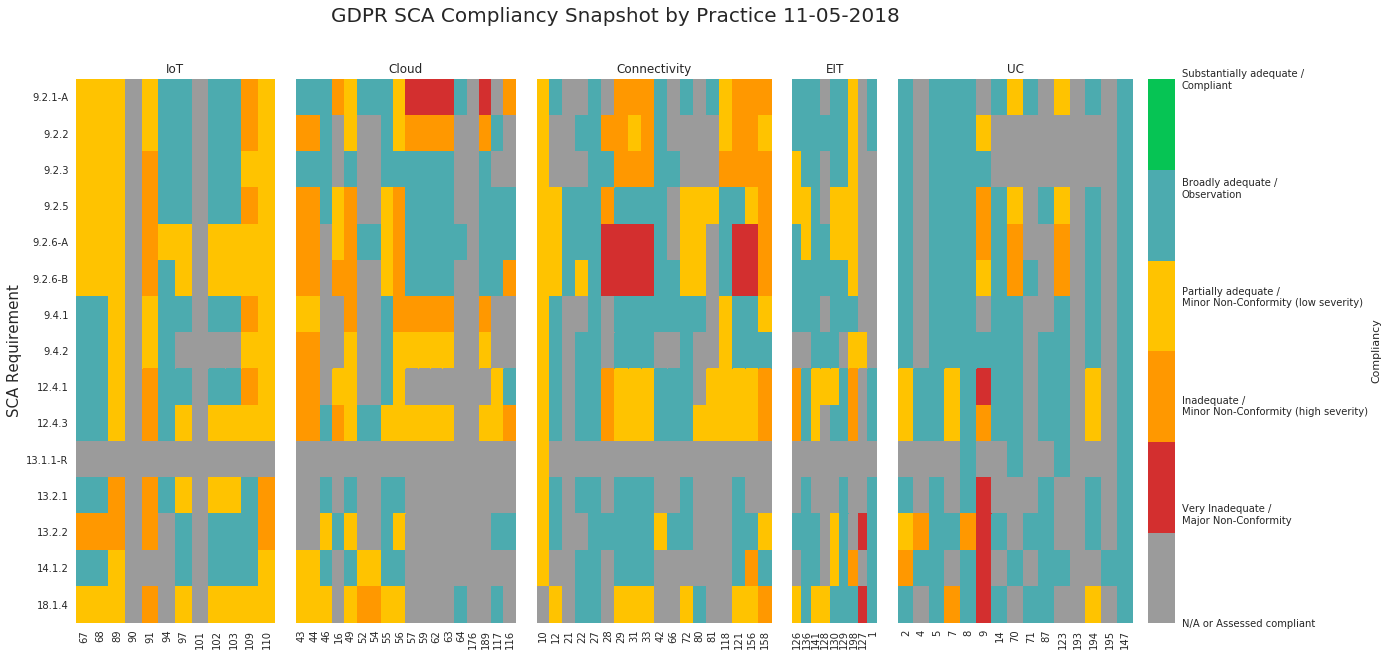

In [1608]:
#SCA Heatmaps
# create subplots
sca_heatmap_df.columns.name = " "

iot_sca_heatmap_df = sca_heatmap_df[iot_cols]
cloud_sca_heatmap_df = sca_heatmap_df[cloud_cols]
connectivity_sca_heatmap_df = sca_heatmap_df[connectivity_cols]
eit_sca_heatmap_df = sca_heatmap_df[eit_cols]
uc_sca_heatmap_df = sca_heatmap_df[uc_cols]



f, (ax, ax1, ax2, ax3, ax4) = plt.subplots(ncols=5, sharex=False, sharey=True, figsize=(20, 10), 
                                           gridspec_kw={"width_ratios":[0.68,0.75,0.8,0.29,1]})
#f.colorbar
f.subplots_adjust(hspace=0.1,wspace=0.1)
#f.subplots_adjust(right=0.5)

#cmap=mcolors.ListedColormap(['#9B9B9B',
#                             '#06C454',
#                             '#2E50FB',
#                             '#FFC300',
#                             '#C70039'])
cmap=mcolors.ListedColormap([GREY,
                             RED,
                             '#FF9800',
                             AMBER,
                             '#4CABAF',
                             GREEN])


title = "GDPR SCA Compliancy Snapshot by Practice "+today
f.suptitle(title, size=20)


zx = sns.heatmap(iot_sca_heatmap_df, ax=ax, square=False, vmin=0, vmax=5, cmap=cmap, cbar=False, yticklabels=True, xticklabels=True)

ax.set_title('IoT')
ax.set_ylabel('SCA Requirement', size=15)

zx1 = sns.heatmap(cloud_sca_heatmap_df, ax=ax1, square=False, vmin=0, vmax=5, cmap=cmap, cbar=False, xticklabels=True)
ax1.set_title('Cloud')

zx2 = sns.heatmap(connectivity_sca_heatmap_df, ax=ax2, square=False, vmin=0, vmax=5, cmap=cmap, cbar=False, xticklabels=True)
ax2.set_title('Connectivity')

zx3 = sns.heatmap(eit_sca_heatmap_df, ax=ax3, square=False, vmin=0, vmax=5, cmap=cmap, cbar=False, xticklabels=True)
ax3.set_title('EIT')

zx4 = sns.heatmap(uc_sca_heatmap_df, ax=ax4, square=False, vmin=0, vmax=5, cmap=cmap, xticklabels=True, cbar_kws={"orientation": "vertical","label": "Compliancy"})
ax4.set_title('UC')

cbar = zx4.collections[0].colorbar
cbar.set_ticks([0, 1, 2, 3, 4, 5])
cbar.set_ticklabels(['N/A or Assessed compliant',
                     'Very Inadequate / \nMajor Non-Conformity',
                     'Inadequate / \nMinor Non-Conformity (high severity)', 
                     'Partially adequate / \nMinor Non-Conformity (low severity)', 
                     'Broadly adequate / \nObservation',
                     'Substantially adequate / \nCompliant'])

f.savefig(OUTPUT_BASE_DIR+"/SCA-Baseline-Per-Practice-Heatmap-"+today+".png", bbox_inches='tight',pad_inches=1)

In [1609]:
#convert back
sca_heatmap_df.replace(to_replace=0, value=SCA_COMPLIANCE_INVERSE.get(0), inplace=True)
sca_heatmap_df.replace(to_replace=1, value=SCA_COMPLIANCE_INVERSE.get(1), inplace=True)
sca_heatmap_df.replace(to_replace=2, value=SCA_COMPLIANCE_INVERSE.get(2), inplace=True)
sca_heatmap_df.replace(to_replace=3, value=SCA_COMPLIANCE_INVERSE.get(3), inplace=True)
sca_heatmap_df.replace(to_replace=4, value=SCA_COMPLIANCE_INVERSE.get(4), inplace=True)
sca_heatmap_df.replace(to_replace=5, value=SCA_COMPLIANCE_INVERSE.get(5), inplace=True)

heatmap_df.replace(to_replace=1, value=PCA_COMPLIANCE_INVERSE.get(1), inplace=True)
heatmap_df.replace(to_replace=2, value=PCA_COMPLIANCE_INVERSE.get(2), inplace=True)
heatmap_df.replace(to_replace=3, value=PCA_COMPLIANCE_INVERSE.get(3), inplace=True)
heatmap_df.replace(to_replace=4, value=PCA_COMPLIANCE_INVERSE.get(4), inplace=True)
heatmap_df.replace(to_replace=5, value=PCA_COMPLIANCE_INVERSE.get(5), inplace=True)

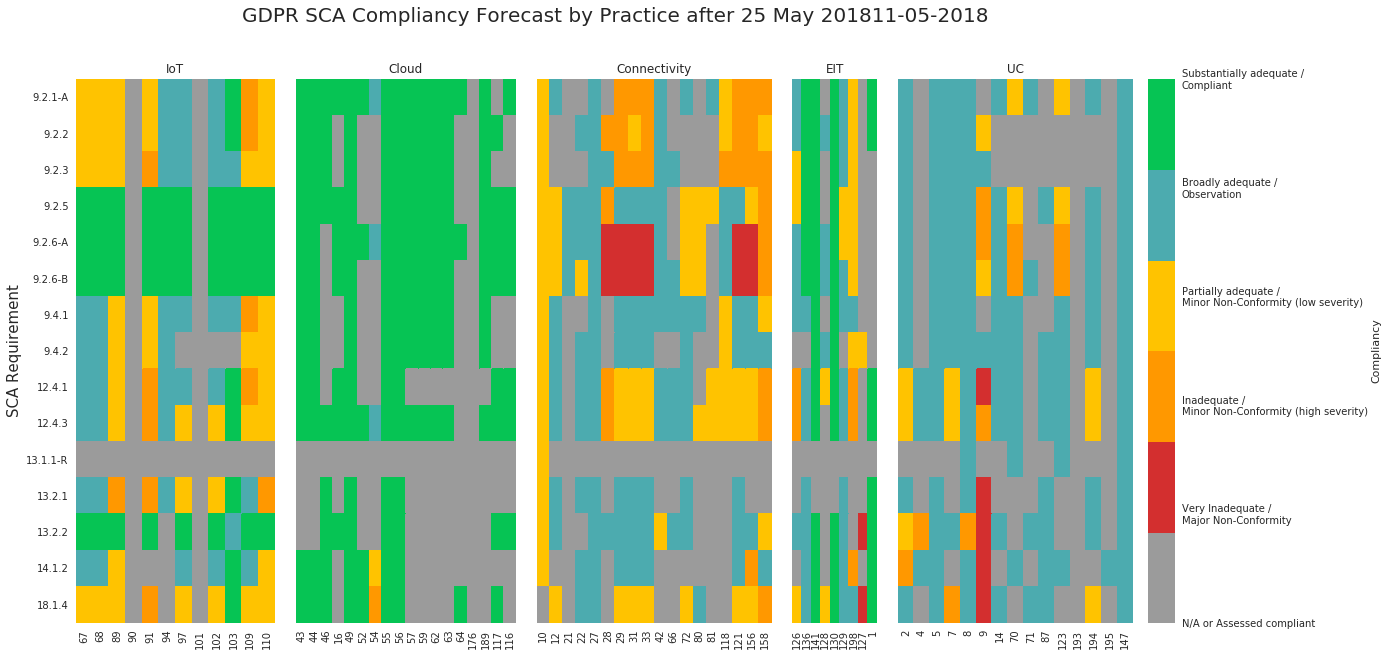

In [1610]:
#SCA Heatmaps
# create subplots
#sca_heatmap_df.columns.name = " "

iot_sca_heatmap_df = sca_forcast_heatmap[iot_cols]
cloud_sca_heatmap_df = sca_forcast_heatmap[cloud_cols]
connectivity_sca_heatmap_df = sca_forcast_heatmap[connectivity_cols]
eit_sca_heatmap_df = sca_forcast_heatmap[eit_cols]
uc_sca_heatmap_df = sca_forcast_heatmap[uc_cols]



f, (ax, ax1, ax2, ax3, ax4) = plt.subplots(ncols=5, sharex=False, sharey=True, figsize=(20, 10), 
                                           gridspec_kw={"width_ratios":[0.68,0.75,0.8,0.29,1]})
#f.colorbar
f.subplots_adjust(hspace=0.1,wspace=0.1)
#f.subplots_adjust(right=0.5)

#cmap=mcolors.ListedColormap(['#9B9B9B',
#                             '#06C454',
#                             '#2E50FB',
#                             '#FFC300',
#                             '#C70039'])
cmap=mcolors.ListedColormap([GREY,
                             RED,
                             '#FF9800',
                             AMBER,
                             '#4CABAF',
                             GREEN])


title = "GDPR SCA Compliancy Forecast by Practice after 25 May 2018"+today
f.suptitle(title, size=20)


zx = sns.heatmap(iot_sca_heatmap_df, ax=ax, square=False, vmin=0, vmax=5, cmap=cmap, cbar=False, yticklabels=True, xticklabels=True)

ax.set_title('IoT')
ax.set_ylabel('SCA Requirement', size=15)

zx1 = sns.heatmap(cloud_sca_heatmap_df, ax=ax1, square=False, vmin=0, vmax=5, cmap=cmap, cbar=False, xticklabels=True)
ax1.set_title('Cloud')

zx2 = sns.heatmap(connectivity_sca_heatmap_df, ax=ax2, square=False, vmin=0, vmax=5, cmap=cmap, cbar=False, xticklabels=True)
ax2.set_title('Connectivity')

zx3 = sns.heatmap(eit_sca_heatmap_df, ax=ax3, square=False, vmin=0, vmax=5, cmap=cmap, cbar=False, xticklabels=True)
ax3.set_title('EIT')

zx4 = sns.heatmap(uc_sca_heatmap_df, ax=ax4, square=False, vmin=0, vmax=5, cmap=cmap, xticklabels=True, cbar_kws={"orientation": "vertical","label": "Compliancy"})
ax4.set_title('UC')

cbar = zx4.collections[0].colorbar
cbar.set_ticks([0, 1, 2, 3, 4, 5])
cbar.set_ticklabels(['N/A or Assessed compliant',
                     'Very Inadequate / \nMajor Non-Conformity',
                     'Inadequate / \nMinor Non-Conformity (high severity)', 
                     'Partially adequate / \nMinor Non-Conformity (low severity)', 
                     'Broadly adequate / \nObservation',
                     'Substantially adequate / \nCompliant'])

f.savefig(OUTPUT_BASE_DIR+"/SCA-Forecast-Per-Practice-Heatmap-"+today+".png", bbox_inches='tight',pad_inches=1)

In [1611]:
pca_baseline.fillna('N/A', inplace=True)

In [1612]:
output_writer = pd.ExcelWriter(OUTPUT_BASE_DIR+'/GDPR-SNAPSHOT-Week'+week+'-'+today+'.xlsx')
heatmap_df.to_excel(output_writer, 'PCA Baseline')
pca_baseline.to_excel(output_writer, 'PCA Rollup Baseline')
new_compliancy_stats.to_excel(output_writer, 'PCA Rollup Baseline Stats')
sca_heatmap_df.to_excel(output_writer, 'SCA Baseline')
pca_df.to_excel(output_writer, 'PCA Data Table')
sca_df.to_excel(output_writer, 'SCA Data Table')
sca_compliancy_stats.to_excel(output_writer, 'SCA Baseline Stats')
output_writer.save()

In [1613]:
pca_df['Compliance Assessment'].value_counts()

PARTIALLY COMPLIANT      2805
NON-COMPLIANT            1563
PARTIALLY COMPLIANT f     665
PARTIALLY COMPLIANT       398
NON-COMPLIANT f           263
N/A                       131
NON-COMPLIANT              74
FULLY COMPLIANT            16
N/a                         3
Name: Compliance Assessment, dtype: int64

# Create HTML Heatmap

In [1614]:
dates_dict = OrderedDict(pca_df['Delivery Date'].value_counts(sort=False))
dates_dict.keys().sort()
dates_dict

sorted_dict = OrderedDict(sorted(dates_dict.items(), key=lambda t: t[0]))
sorted_dict

OrderedDict([(Timestamp('2017-04-30 00:00:00'), 27),
             (Timestamp('2018-02-08 00:00:00'), 4),
             (Timestamp('2018-02-28 00:00:00'), 48),
             (Timestamp('2018-03-07 00:00:00'), 1),
             (Timestamp('2018-03-25 00:00:00'), 1),
             (Timestamp('2018-03-28 00:00:00'), 2),
             (Timestamp('2018-03-30 00:00:00'), 4),
             (Timestamp('2018-03-31 00:00:00'), 86),
             (Timestamp('2018-04-27 00:00:00'), 104),
             (Timestamp('2018-04-30 00:00:00'), 395),
             (Timestamp('2018-05-01 00:00:00'), 79),
             (Timestamp('2018-05-11 00:00:00'), 492),
             (Timestamp('2018-05-15 00:00:00'), 79),
             (Timestamp('2018-05-18 00:00:00'), 1622),
             (Timestamp('2018-05-25 00:00:00'), 592),
             (Timestamp('2018-05-30 00:00:00'), 2),
             (Timestamp('2018-05-31 00:00:00'), 21),
             (Timestamp('2018-06-04 00:00:00'), 8),
             (Timestamp('2018-06-08 00:00:00'),

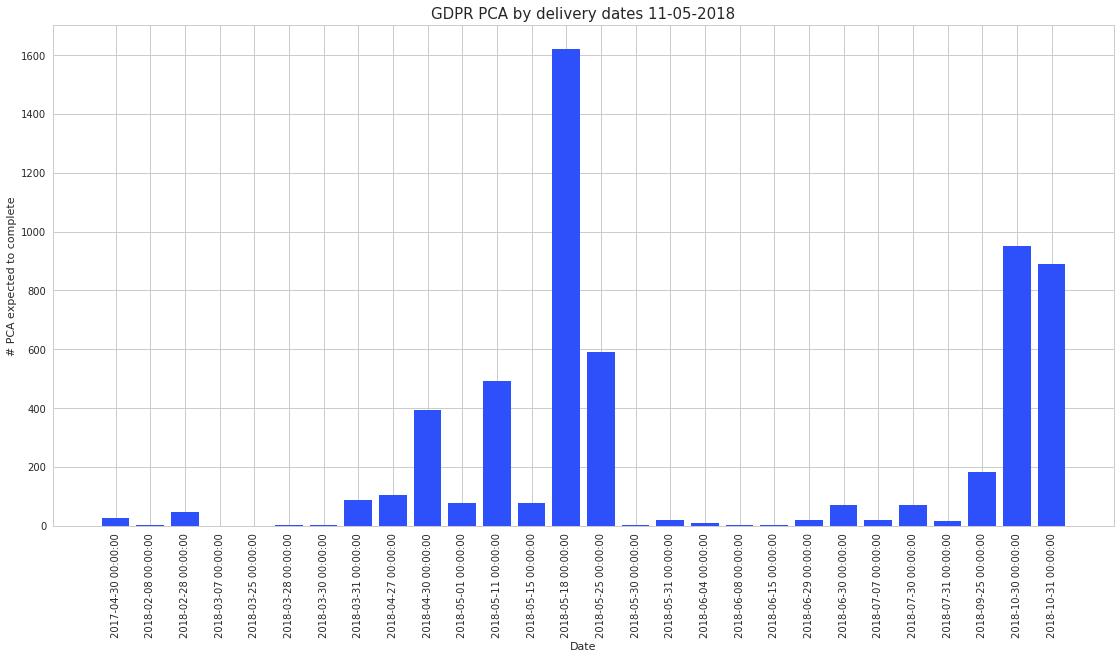

In [1615]:
f, ax = plt.subplots(figsize=(19, 12))
f.subplots_adjust(bottom=0.3,hspace=0.5,wspace=0.5)

#OrderedDict(sorted(d.items(), key=lambda t: t[0]))
dates = sorted_dict

bars = list(dates.values())
xticks = list(dates.keys())

#bar1.append(pca_burndown_df[today]['Total'])

#xticks.append(today)

x= np.arange(len(bars))

plt.bar(x, bars, color=BLUE)
plt.xticks(x, xticks, rotation=90)
plt.xlabel("Date")
plt.ylabel("# PCA expected to complete")
plt.title("GDPR PCA by delivery dates "+today, size=15)
f.savefig(OUTPUT_BASE_DIR+"/PCA-Delivery-Dates-"+today+".png")

In [1616]:
pca_df.head()

,Compliance Assessment,Delivery Date,Entity Count,Filename,Product ID,Remediation Project Ref,Req Ref,Req nr,Response,Response Comments,Product Ref,Category,Orphan,Practice,Risk Category,Approved by DPO:,"If Approved, change to ?",New Comment to be inserted into RS and DPIA
0,NON-COMPLIANT,2018-05-01,3.0,GDPR-RS-EPS072-VSDM-Airwatch-V5.0 RI RELEASED....,72,GE-PCA-57H,EPS072-PCA-57H-A,57H,Acknowledged,There are three streams here included:\n1) The...,EPS072-PCA-57H,PCA,Project Code Allocated,Connectivity,F,NaN,NaN,NaN
1,NON-COMPLIANT,2018-10-30,3.0,GDPR-RS-EPS072-VSDM-Airwatch-V5.0 RI RELEASED....,72,No Response,EPS072-PCA-57V-A,57V,Acknowledged,There are three steps:\n1) Identify in Service...,EPS072-PCA-57V,PCA,No Project Code,Connectivity,F,NaN,NaN,NaN
2,NON-COMPLIANT,2018-05-25,3.0,GDPR-RS-EPS072-VSDM-Airwatch-V5.0 RI RELEASED....,72,GE-PCA-58H,EPS072-PCA-58H-A,58H,Acknowledged,"Pending on legal investigation, can we underst...",EPS072-PCA-58H,PCA,Project Code Allocated,Connectivity,F,NaN,NaN,NaN
3,N/A,NaT,3.0,GDPR-RS-EPS072-VSDM-Airwatch-V5.0 RI RELEASED....,72,No Response,EPS072-PCA-53V-A,53V,Closed,changed from NC/PC as a result of Privacy 2nd ...,EPS072-PCA-53V,PCA,No Project Code,Connectivity,F,NaN,NaN,NaN
4,PARTIALLY COMPLIANT,2018-05-15,3.0,GDPR-RS-EPS072-VSDM-Airwatch-V5.0 RI RELEASED....,72,EPS-PCA-1H,EPS072-PCA-1H-A,1H,Acknowledged,Needs to be identified in which role should th...,EPS072-PCA-1H,PCA,Project Code Allocated,Connectivity,A,NaN,NaN,NaN


In [1617]:
def return_risk_score( risk_cat ):
    #print int(prod_id)
    if risk_cat == 'A':
        return 1
    elif risk_cat == 'B':
        return 2
    elif risk_cat == 'C':
        return 3
    elif risk_cat == 'D':
        return 4
    elif risk_cat == 'E':
        return 5
    elif risk_cat == 'F':
        return 6
    elif risk_cat == 'G':
        return 7
    elif risk_cat == 'H':
        return 8
    elif risk_cat == 'I':
        return 9
    
pca_df['Risk Score'] = pca_df['Risk Category'].map(lambda x: return_risk_score(x))

In [1618]:
pca_df['Comp'] = pca_df['Compliance Assessment'].map(lambda x: PCA_COMPLIANCE.get(x))
pca_df.head(2)

,Compliance Assessment,Delivery Date,Entity Count,Filename,Product ID,Remediation Project Ref,Req Ref,Req nr,Response,Response Comments,Product Ref,Category,Orphan,Practice,Risk Category,Approved by DPO:,"If Approved, change to ?",New Comment to be inserted into RS and DPIA,Risk Score,Comp
0,NON-COMPLIANT,2018-05-01,3.0,GDPR-RS-EPS072-VSDM-Airwatch-V5.0 RI RELEASED....,72,GE-PCA-57H,EPS072-PCA-57H-A,57H,Acknowledged,There are three streams here included:\n1) The...,EPS072-PCA-57H,PCA,Project Code Allocated,Connectivity,F,NaN,NaN,NaN,6,5
1,NON-COMPLIANT,2018-10-30,3.0,GDPR-RS-EPS072-VSDM-Airwatch-V5.0 RI RELEASED....,72,No Response,EPS072-PCA-57V-A,57V,Acknowledged,There are three steps:\n1) Identify in Service...,EPS072-PCA-57V,PCA,No Project Code,Connectivity,F,NaN,NaN,NaN,6,5


# Create HTML Report

In [1619]:
from math import pi
import pandas as pd

from bokeh.io import show
from bokeh.models import (
    ColumnDataSource,
    HoverTool,
    LinearColorMapper,
    BasicTicker,
    PrintfTickFormatter,
    ColorBar,
)
from bokeh.plotting import figure, show, output_file, reset_output

In [1620]:
"""
PCA_COMPLIANCE = {
    'NON-COMPLIANT':5, 
    'NON-COMPLIANT ':5, 
    'NON-COMPLIANT f':5, 
    'NON-COMPLIANT(F)':5, 
    'PARTIALLY COMPLIANT':4, 
    'PARTIALLY COMPLIANT ':4, 
    'PARTIALLY COMPLIANT f':4,
    'PARTIALLY COMPLIANT(F)':4,
    'COMPLIANT':3,
    'FULLY COMPLIANT':3,
    'FULLY COMPLIANT ':3,
    'FULLY COMPLIANT f':3,
    'TRANSFER':2,
    'RESOLVED':2,
    'N/a':1,
    'N/A':1
}

GREY = '#9B9B9B'
GREEN = '#06C454'
BLUE = '#2E50FB'
AMBER = '#FFC300'
RED = '#D32F2F'
"""

pca_data = pca_rollup_target.copy()

In [1621]:
#pca_data.rename(columns = {'Req nr':'PCA'}, inplace = True)

#pca_data['PCA'] = pca_data['PCA'].astype(str)
cols = list(pca_data.columns.astype(str))
pca_data.columns = cols
#pca_data = pca_data.set_index('PCA')
pca_data.index.name = 'PCA'
pca_data.columns.name = 'Product'

pca_data.replace('N/A', 1.0, inplace=True)
pca_data.replace('RESOLVED/TRANSFERED', 2.0, inplace=True)
pca_data.replace('FULLY COMPLIANT', 3.0, inplace=True)
pca_data.replace('PARTIALLY COMPLIANT', 4.0, inplace=True)
pca_data.replace('NON-COMPLIANT', 5.0, inplace=True)

In [1622]:
pca_data.head()

Product,67,68,89,90,91,94,97,101,102,103,...,9,14,70,71,87,123,193,194,195,147
PCA,,,,,,,,,,,,,,,,,,,,,
1,3.0,4.0,3.0,3.0,3.0,3.0,3.0,2.0,3.0,3.0,...,5.0,2.0,4.0,4.0,5.0,5.0,2.0,2.0,2.0,5.0
2,4.0,4.0,4.0,4.0,4.0,4.0,3.0,2.0,4.0,4.0,...,5.0,2.0,4.0,4.0,5.0,4.0,2.0,2.0,2.0,3.0
3,4.0,2.0,3.0,2.0,2.0,3.0,2.0,2.0,2.0,3.0,...,2.0,1.0,3.0,3.0,1.0,2.0,1.0,1.0,1.0,1.0
4,2.0,3.0,5.0,5.0,5.0,5.0,5.0,2.0,5.0,5.0,...,3.0,2.0,3.0,3.0,3.0,3.0,2.0,2.0,2.0,5.0
5,3.0,3.0,3.0,4.0,3.0,3.0,4.0,2.0,3.0,3.0,...,3.0,2.0,3.0,3.0,4.0,3.0,2.0,2.0,3.0,3.0


In [1623]:
# reshape to 1D array or rates with a month and year for each row.
df = pd.DataFrame(pca_data.stack(), columns=['compliancy']).reset_index()
#ataFrame.sort(columns=None, axis=0, ascending=True, inplace=False, kind='quicksort', na_position='last', **kwargs)
#df.sort_values(by='PCA', ascending=False, inplace=True)
#df.reset_index(inplace=True,drop=True)
df = df.copy()
df.head()

,PCA,Product,compliancy
0,1,67,3.0
1,1,68,4.0
2,1,89,3.0
3,1,90,3.0
4,1,91,3.0


In [1624]:
cookbook_df = pd.read_excel("/home/andy/dev/notebooks/Transfer-RS-Feedback/Cookbook/PCA SCA Cookbook Mapping_1.03.xlsx", 
                            sheet_name="PCA", skiprows=1)

cookbook_df['Privacy Requirement'].fillna(method='ffill', inplace=True)
cookbook_df.head(1)

,Req nr,RS Reference Number,Req category,Privacy Requirement,Implementation criteria (if applicable),Cookbook RS Statements,Relevant for Controller (C) OR Processor (P),People+Process Applicable,Technology (& Design) Applicable,Delivery Guide Mapping,Horizontal / Vertical,Responsible Programme,Accountable,Responsible,Delivery Category,Support & Advisor,Template Dependency,Notes
0,1,EPSXXX-PCA01-Y,"Define privacy responsibilities, document the ...",Must design and engineer privacy into products...,Accountability and resources: Roles and respon...,1. A privacy champion must be identified in t...,"C, P",Mandatory,NaN,7.7,Horizontal,EP&S Programme,EP&S Programme,EP&S Programme,Governance (requires privacy guidelines),NaN,"No, however Product Team may need to implement...",EP&S GDPR Programme Governance to fulfil EP&S ...


In [1625]:
#cookbook_df = cookbook_df[['Req nr', 'Req category', 'Privacy Requirement']]

In [1626]:
"""A.merge(B, left_on='lkey', right_on='rkey', how='outer')
   lkey  value_x  rkey  value_y
0  foo   1        foo   5
1  foo   4        foo   5
2  bar   2        bar   6
3  bar   2        bar   8
4  baz   3        NaN   NaN
5  NaN   NaN      qux   7"""

df = df.merge(cookbook_df, left_on='PCA', right_on='Req nr', how='outer')

In [1627]:
#df.rename({'Req category': 'category', 'Privacy Requirement': 'requirement'}, axis=1,inplace=True)
df.head(2)

,PCA,Product,compliancy,Req nr,RS Reference Number,Req category,Privacy Requirement,Implementation criteria (if applicable),Cookbook RS Statements,Relevant for Controller (C) OR Processor (P),...,Technology (& Design) Applicable,Delivery Guide Mapping,Horizontal / Vertical,Responsible Programme,Accountable,Responsible,Delivery Category,Support & Advisor,Template Dependency,Notes
0,1,67,3.0,1,EPSXXX-PCA01-Y,"Define privacy responsibilities, document the ...",Must design and engineer privacy into products...,Accountability and resources: Roles and respon...,1. A privacy champion must be identified in t...,"C, P",...,NaN,7.7,Horizontal,EP&S Programme,EP&S Programme,EP&S Programme,Governance (requires privacy guidelines),NaN,"No, however Product Team may need to implement...",EP&S GDPR Programme Governance to fulfil EP&S ...
1,1,68,4.0,1,EPSXXX-PCA01-Y,"Define privacy responsibilities, document the ...",Must design and engineer privacy into products...,Accountability and resources: Roles and respon...,1. A privacy champion must be identified in t...,"C, P",...,NaN,7.7,Horizontal,EP&S Programme,EP&S Programme,EP&S Programme,Governance (requires privacy guidelines),NaN,"No, however Product Team may need to implement...",EP&S GDPR Programme Governance to fulfil EP&S ...


In [1628]:
pca = list(pca_data.index.astype(str))
product = list(pca_data.columns)

In [1629]:
# this is the colormap from the original NYTimes plot
colors = [GREY, GREEN, BLUE, AMBER, RED]
mapper = LinearColorMapper(palette=colors, low=df.compliancy.min(), high=df.compliancy.max())

In [1630]:
datadict = df.to_dict(orient='list', into=OrderedDict)

In [1631]:
#datadict
reset_output()

In [1632]:
source = ColumnDataSource(datadict)

In [1633]:
#datadict[u'Req category']

In [1634]:
TOOLS = "hover,save,pan,box_zoom,reset,wheel_zoom"

p = figure(title="EP&S PCA Compliancy - (1 = Not Applicable, 2 = Transfer/Resolved, 3 = Fully Compliant, 4 = Partially Compliant, 5 = Non-Compliant)",
           x_range=list(product), y_range=list((pca)),
           x_axis_location="above", plot_width=1000, plot_height=600,
           tools=TOOLS, toolbar_location='below')

p.grid.grid_line_color = None
p.axis.axis_line_color = None
p.axis.major_tick_line_color = None
p.axis.major_label_text_font_size = "5pt"
p.axis.major_label_standoff = 0
p.xaxis.major_label_orientation = pi / 3

p.rect(x="Product", y="PCA", width=1, height=1,
       source=source,
       fill_color={'field': 'compliancy', 'transform': mapper},
       line_color=None)

color_bar = ColorBar(color_mapper=mapper, major_label_text_font_size="5pt",
                     ticker=BasicTicker(desired_num_ticks=len(colors)),
                     formatter=PrintfTickFormatter(format="%d"),
                     label_standoff=6, border_line_color=None, location=(0, 0))
p.add_layout(color_bar, 'right')

p.select_one(HoverTool).tooltips = [
     ('PCA', '@PCA'),
     ('Category', '@{Req category}'),
     ('Requirement', '@{Privacy Requirement}{safe}'),
     ('Product', '@Product'),
     ('Compliancy', '@compliancy'),
]

p.select_one(HoverTool).attachment = "horizontal"

output_file(OUTPUT_BASE_DIR+"/PCA-Compliancy-Report-"+today+".html")

In [1635]:
show(p)

In [1636]:
pwd

u'/home/andy/dev/notebooks/Transfer-RS-Feedback'

In [1637]:
before_25May_df = pca_df[pca_df['Delivery Date'] <= '2018-05-25'].copy()

In [1638]:
after_25May_df = pca_df[pca_df['Delivery Date'] > '2018-05-25'].copy()

In [1639]:
output_writer = pd.ExcelWriter(OUTPUT_BASE_DIR+'/GDPR-BYDATE-SNAPSHOT-Week'+week+'-'+today+'.xlsx')
before_25May_df.to_excel(output_writer, 'PCA Up to 25 May')
after_25May_df.to_excel(output_writer, 'PCA After 25 May')


In [1640]:
sca_before_25May_df = sca_df[sca_df['Delivery Date'] <= '2018-05-25'].copy()

In [1641]:
sca_after_25May_df = sca_df[sca_df['Delivery Date'] > '2018-05-25'].copy()

In [1642]:
sca_before_25May_df.to_excel(output_writer, 'SCA Up to 25 May')
sca_after_25May_df.to_excel(output_writer, 'SCA After 25 May')

output_writer.save()